<a href="https://colab.research.google.com/github/adeliiee22/edelweiss/blob/main/Palmer_Archipelago_(Antarctica)_Dewi_Adelia_Priyono.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement and Objective


**Problem Statement:**
Kepulauan Palmer, juga dikenal sebagai Kepulauan Antartika, Archipiélago Palmer, Antarktiske Arkipel atau Palmer Inseln, adalah sekelompok pulau di lepas pantai barat laut Semenanjung Antartika. Itu membentang dari Tower Island di utara ke Pulau Anvers di selatan dimana beberapa spesies penguin berhabitat.

**Objective:**
Untuk mengetahui persebaran penguin dan korelasi setiap spesies penguin dengan fitur dan bentuk tubuh di pulau-pulau yang tersebar di kepulauan Palmer

## Import Data

In [ ]:
# membuat akses ke google drive untuk load data

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# load data dan simpan sebagai dataframe df

import pandas as pd

# df = pd.read_csv("/content/drive/MyDrive/CSV/penguins.csv")
df = pd.read_csv("/content/drive/MyDrive/CSV/penguins.csv")

df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
df_temp = df [["species", "island"]]

In [ ]:
one_hot_encoded_data = pd.get_dummies(df_temp, columns =['species'])

In [ ]:
one_hot_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   island             344 non-null    object
 1   species_Adelie     344 non-null    uint8 
 2   species_Chinstrap  344 non-null    uint8 
 3   species_Gentoo     344 non-null    uint8 
dtypes: object(1), uint8(3)
memory usage: 3.8+ KB


## Data Cleaning

In [ ]:
df.shape

(344, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [ ]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## EDA

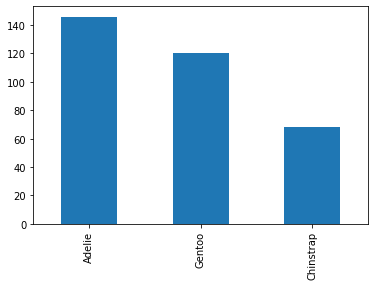

In [ ]:
df['species'].value_counts().plot.bar()

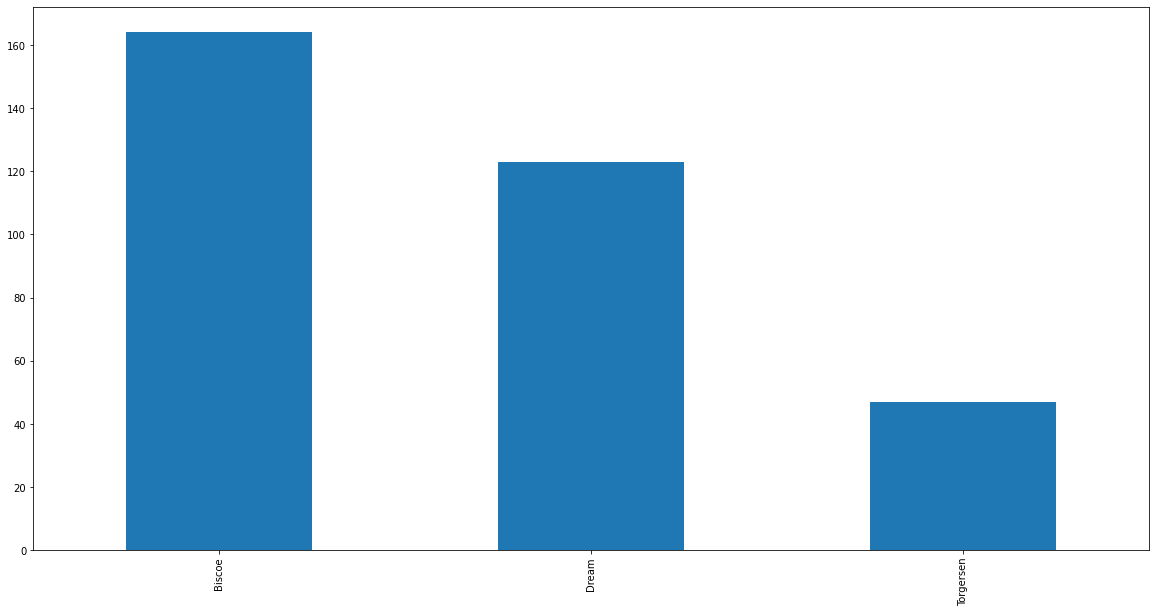

In [ ]:
df['island'].value_counts().plot.bar(figsize=(20,10))

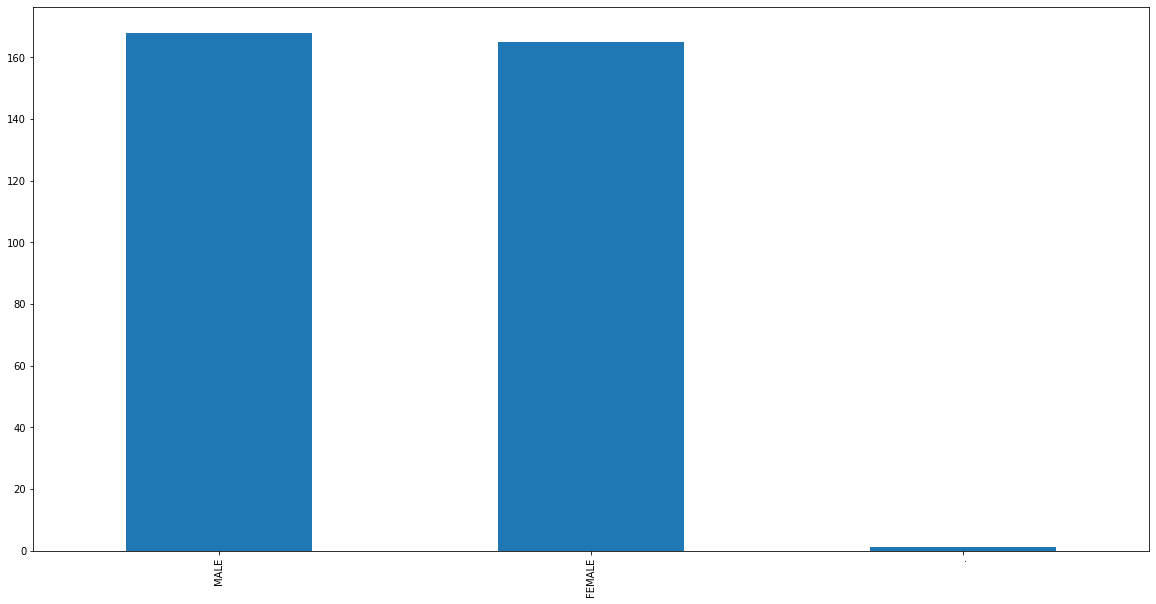

In [ ]:
df['sex'].value_counts().plot.bar(figsize=(20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff47530ce20>]],
      dtype=object)

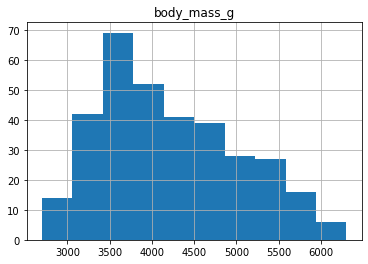

In [ ]:
df.hist(column='body_mass_g', bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff4752f0c10>]],
      dtype=object)

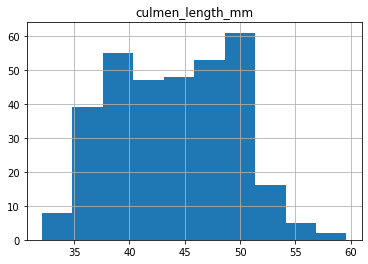

In [ ]:
df.hist(column='culmen_length_mm', bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff47520a3d0>]],
      dtype=object)

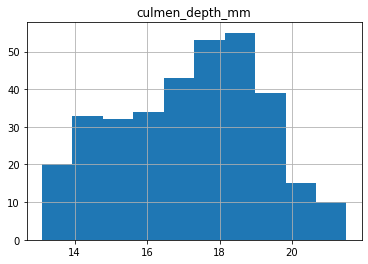

In [ ]:
df.hist(column='culmen_depth_mm', bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff4751f2d00>]],
      dtype=object)

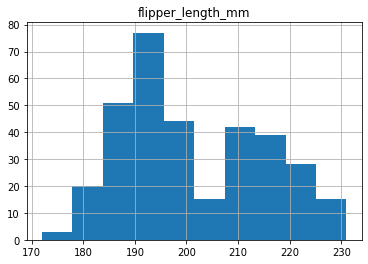

In [ ]:
df.hist(column='flipper_length_mm', bins=10)

## Data Visualizaton

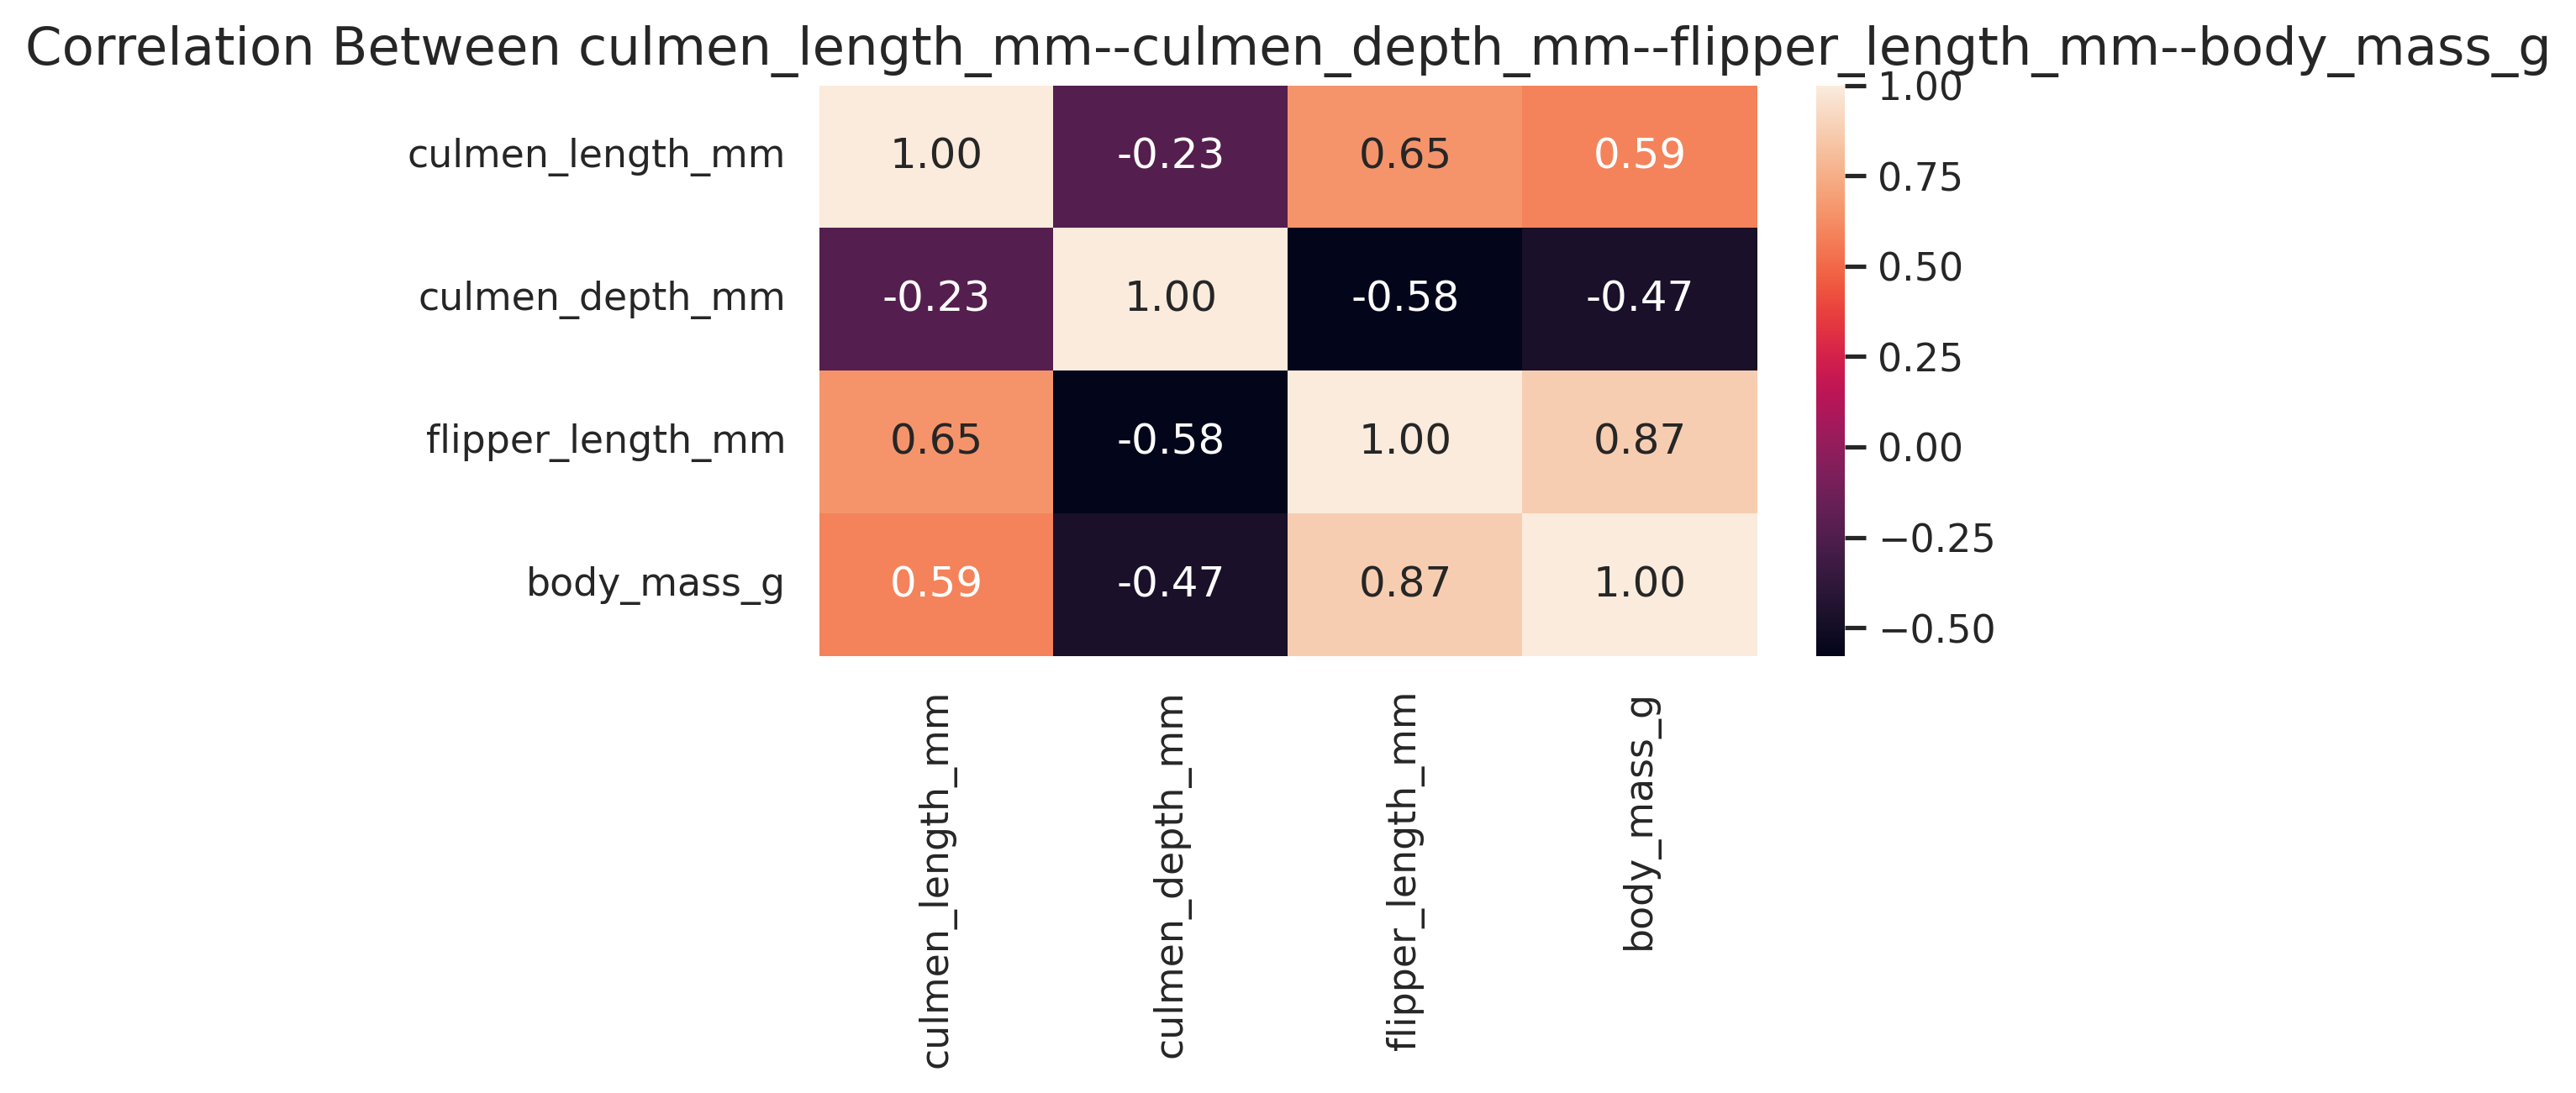

In [ ]:
list1 = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
sns.heatmap(df[list1].corr(),annot = True, fmt = ".2f")
plt.title("Correlation Between culmen_length_mm--culmen_depth_mm--flipper_length_mm--body_mass_g", size=15)
plt.show()

Dari heatmap kita dapat melihat korelasi antara flipper_length_mm and body_mass_g memiliki nilai korelasi yang tinggi yaitu 0,87! Ini artinya semakin panjang sirip maka kemungkinan penguin akan memiliki nilai berat badan yang besar juga 📈

## Flipper Length

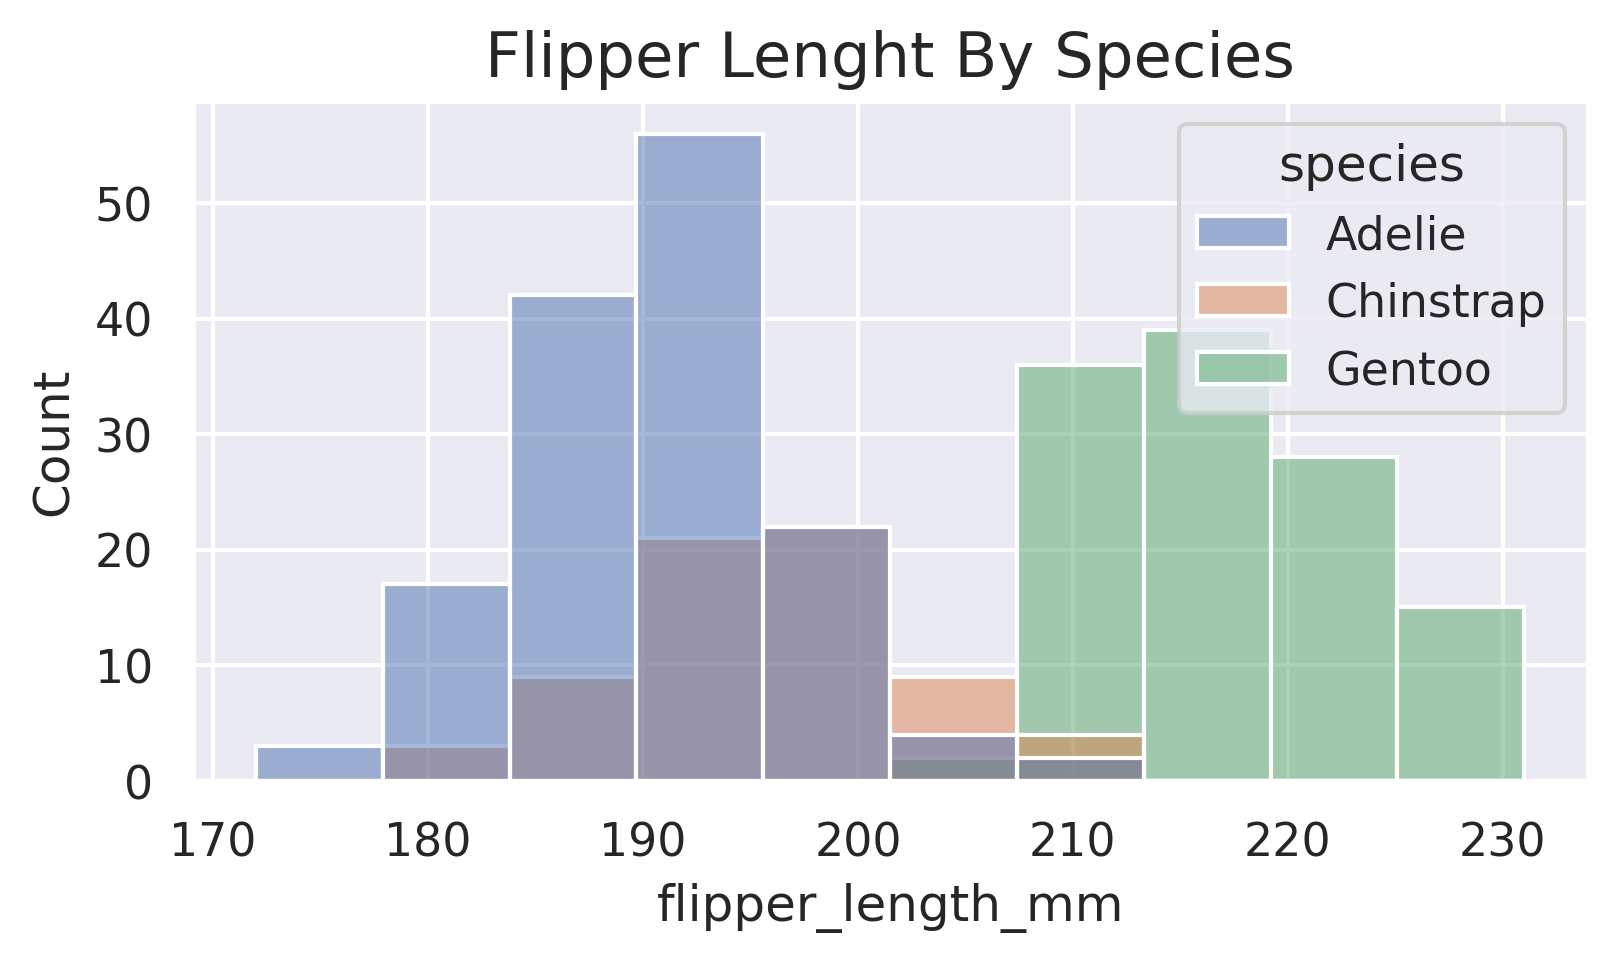

In [ ]:
sns.histplot(x = "flipper_length_mm", data = df, hue = "species")
plt.title("Flipper Lenght By Species", size=15)
plt.show()


*  Spesies Gentoo species memiliki panjang sirip lebih panjang
*  Rata-rata panjang sirip seluruh spesies berkisar antara 190-200
*  Hanya spesies Gentoo yang memiliki panjang sirip 220 dan 230

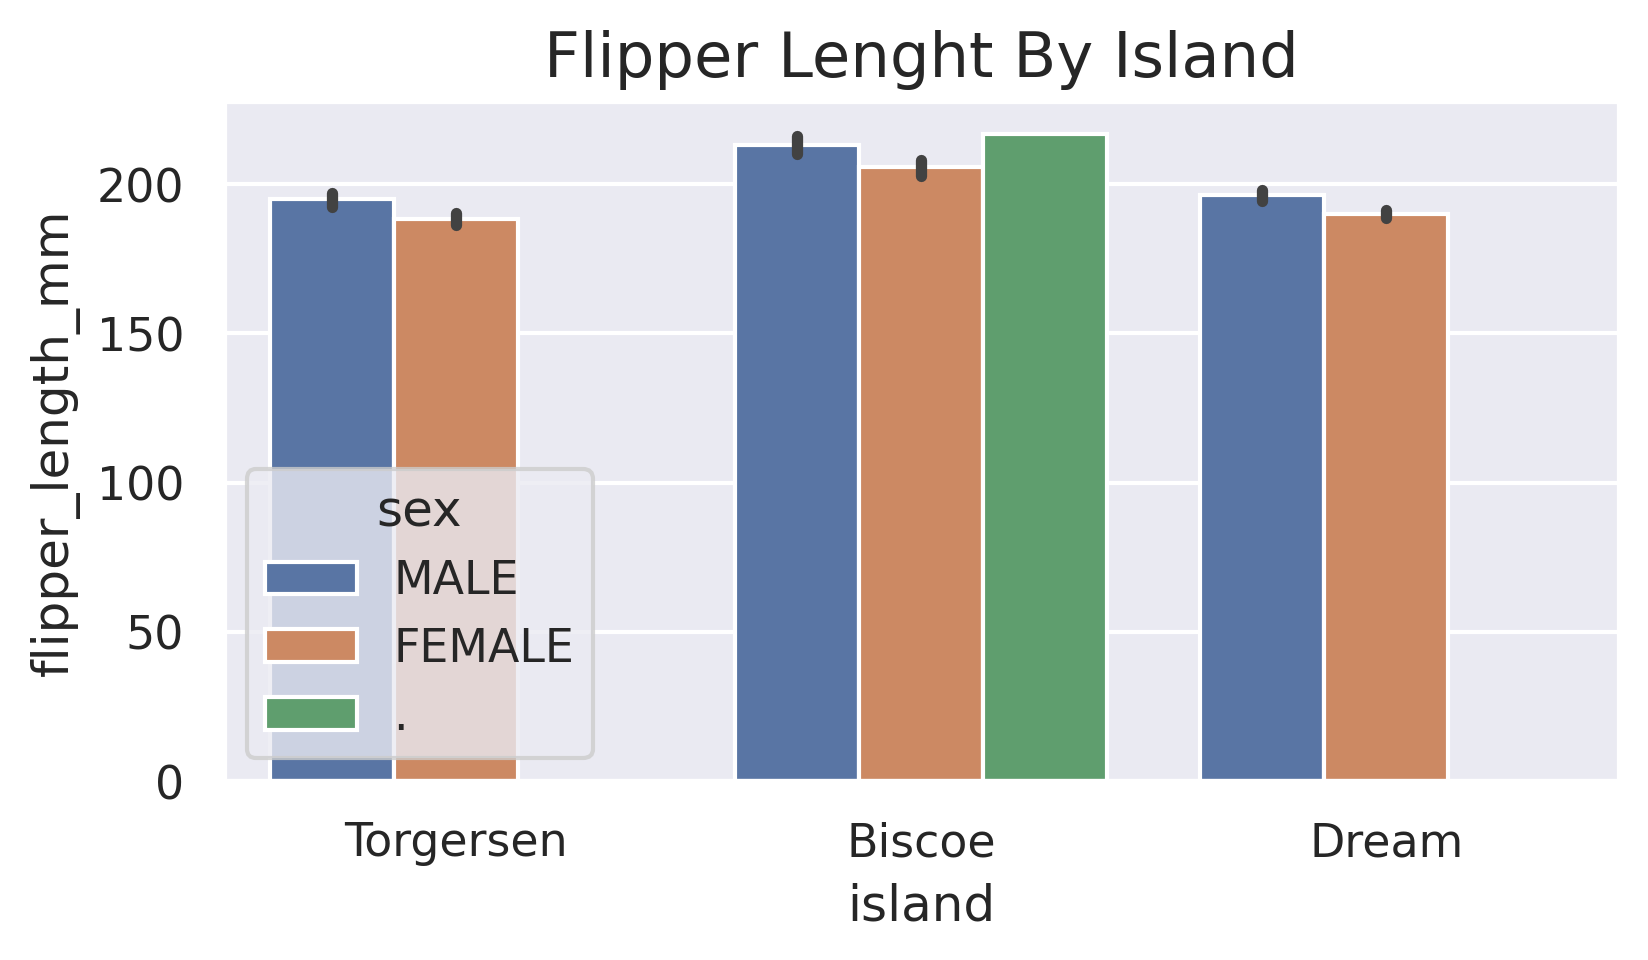

In [ ]:
sns.barplot(x = "island", y = "flipper_length_mm", data = df, hue = "sex")
plt.title("Flipper Lenght By Island", size=15)
plt.show()



*   Penguin di pulau Biscoe memiliki panjang sirip lebih panjang dari pulau lain

## Body Mass

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


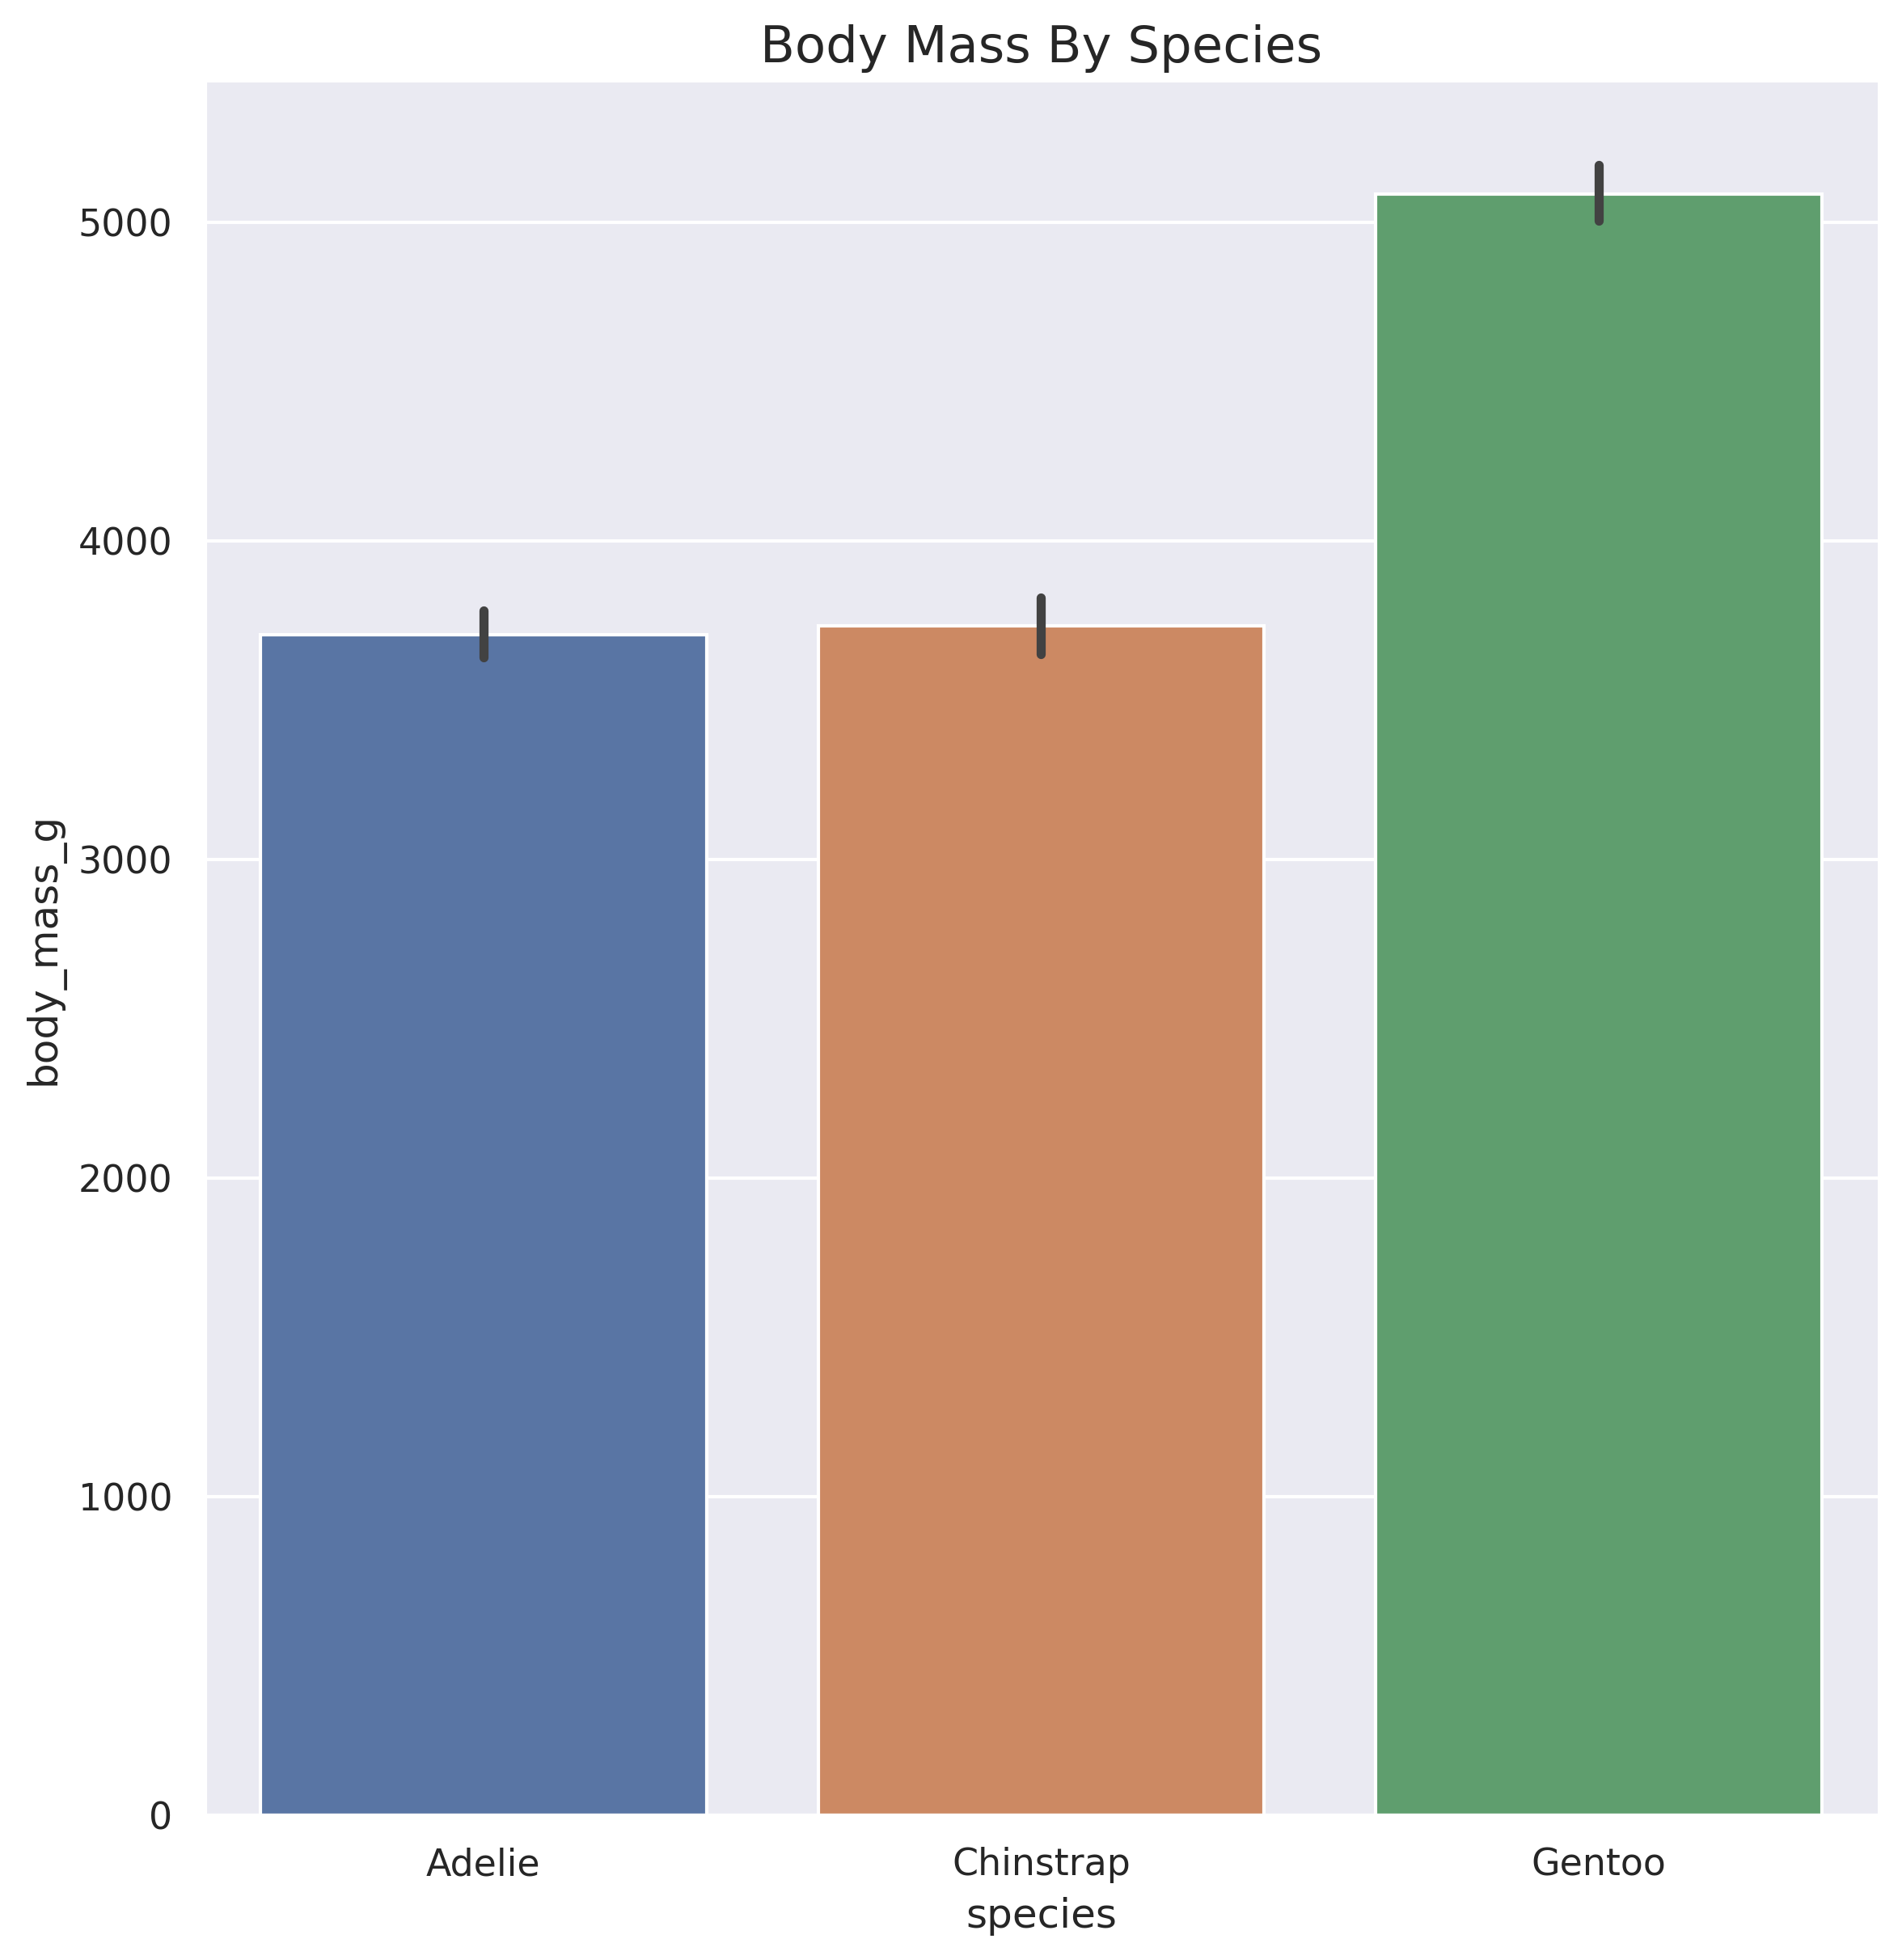

In [ ]:
g = sns.factorplot(x = "species", y = "body_mass_g", kind = "bar",data = df, size = 8 )
plt.title("Body Mass By Species", size=15)
plt.show()



*   Spesies Gentoo memiliki berat badan paling besar
*   Spesies Adelie dan Chinstrap memiliki berat badan yang mirip


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


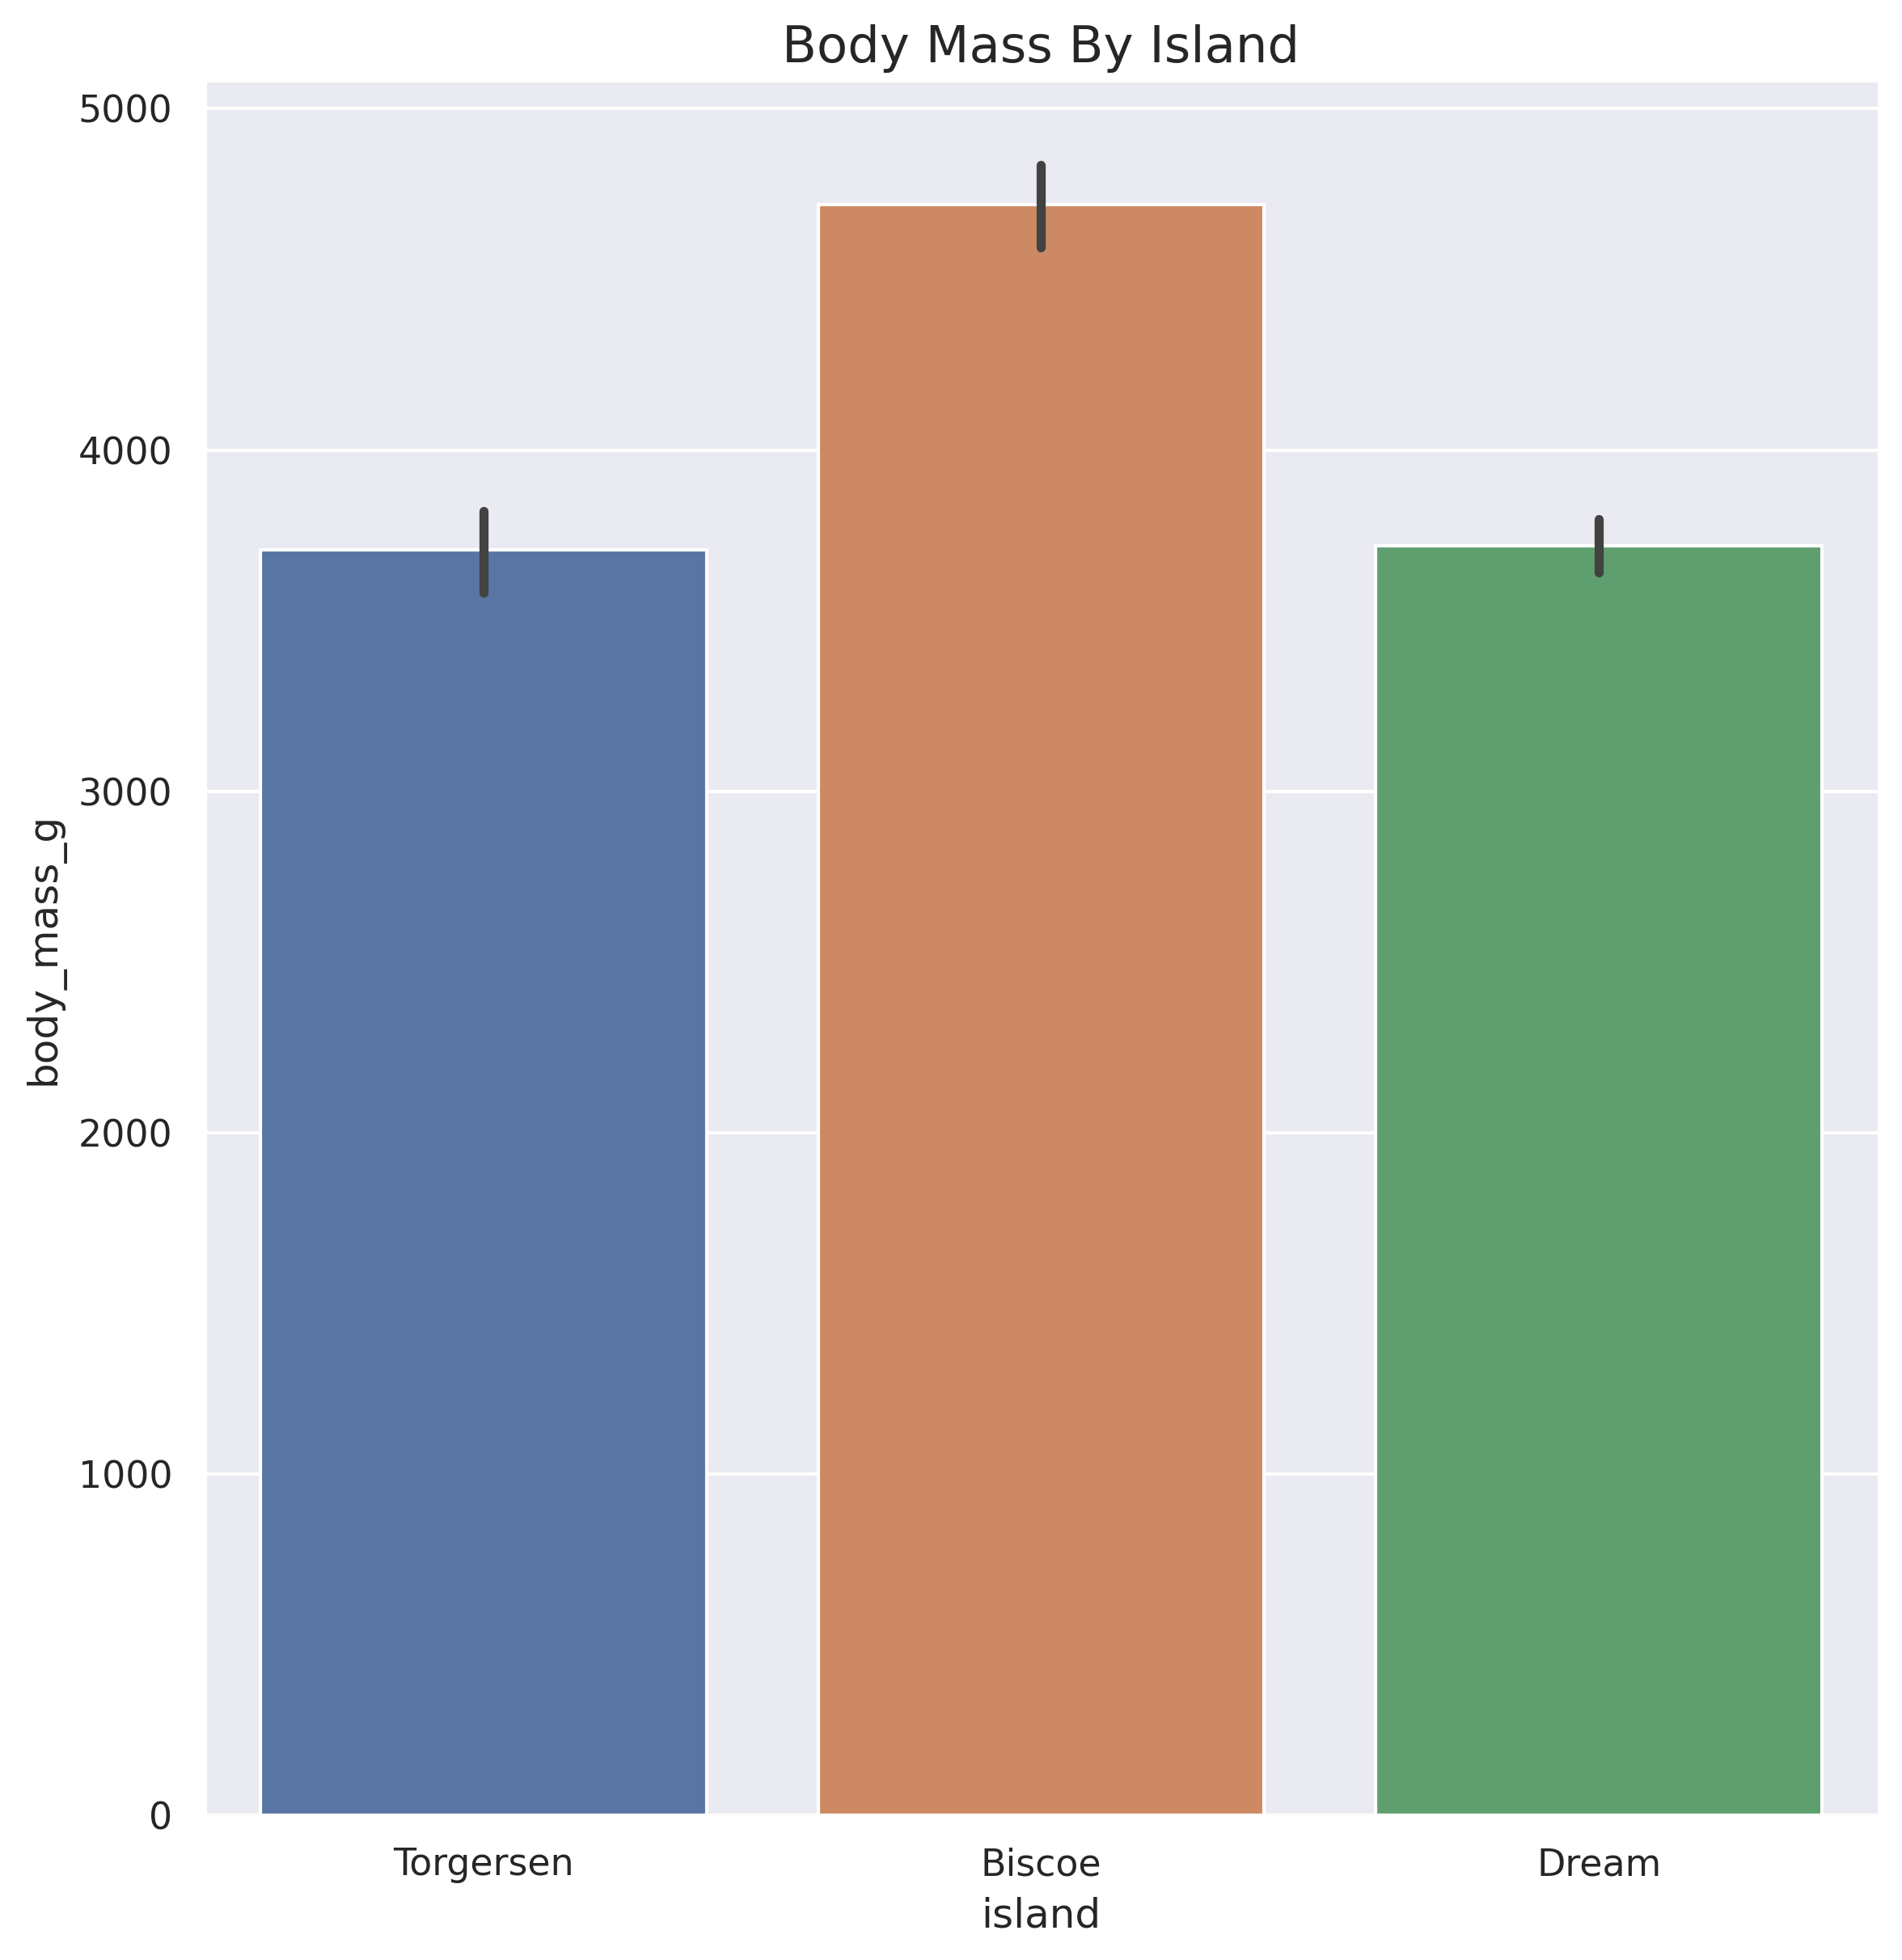

In [ ]:
g = sns.factorplot(x = "island", y = "body_mass_g", kind = "bar",data = df, size = 8 )
plt.title("Body Mass By Island", size=15)
plt.show()

## Island and Penguin's Sex

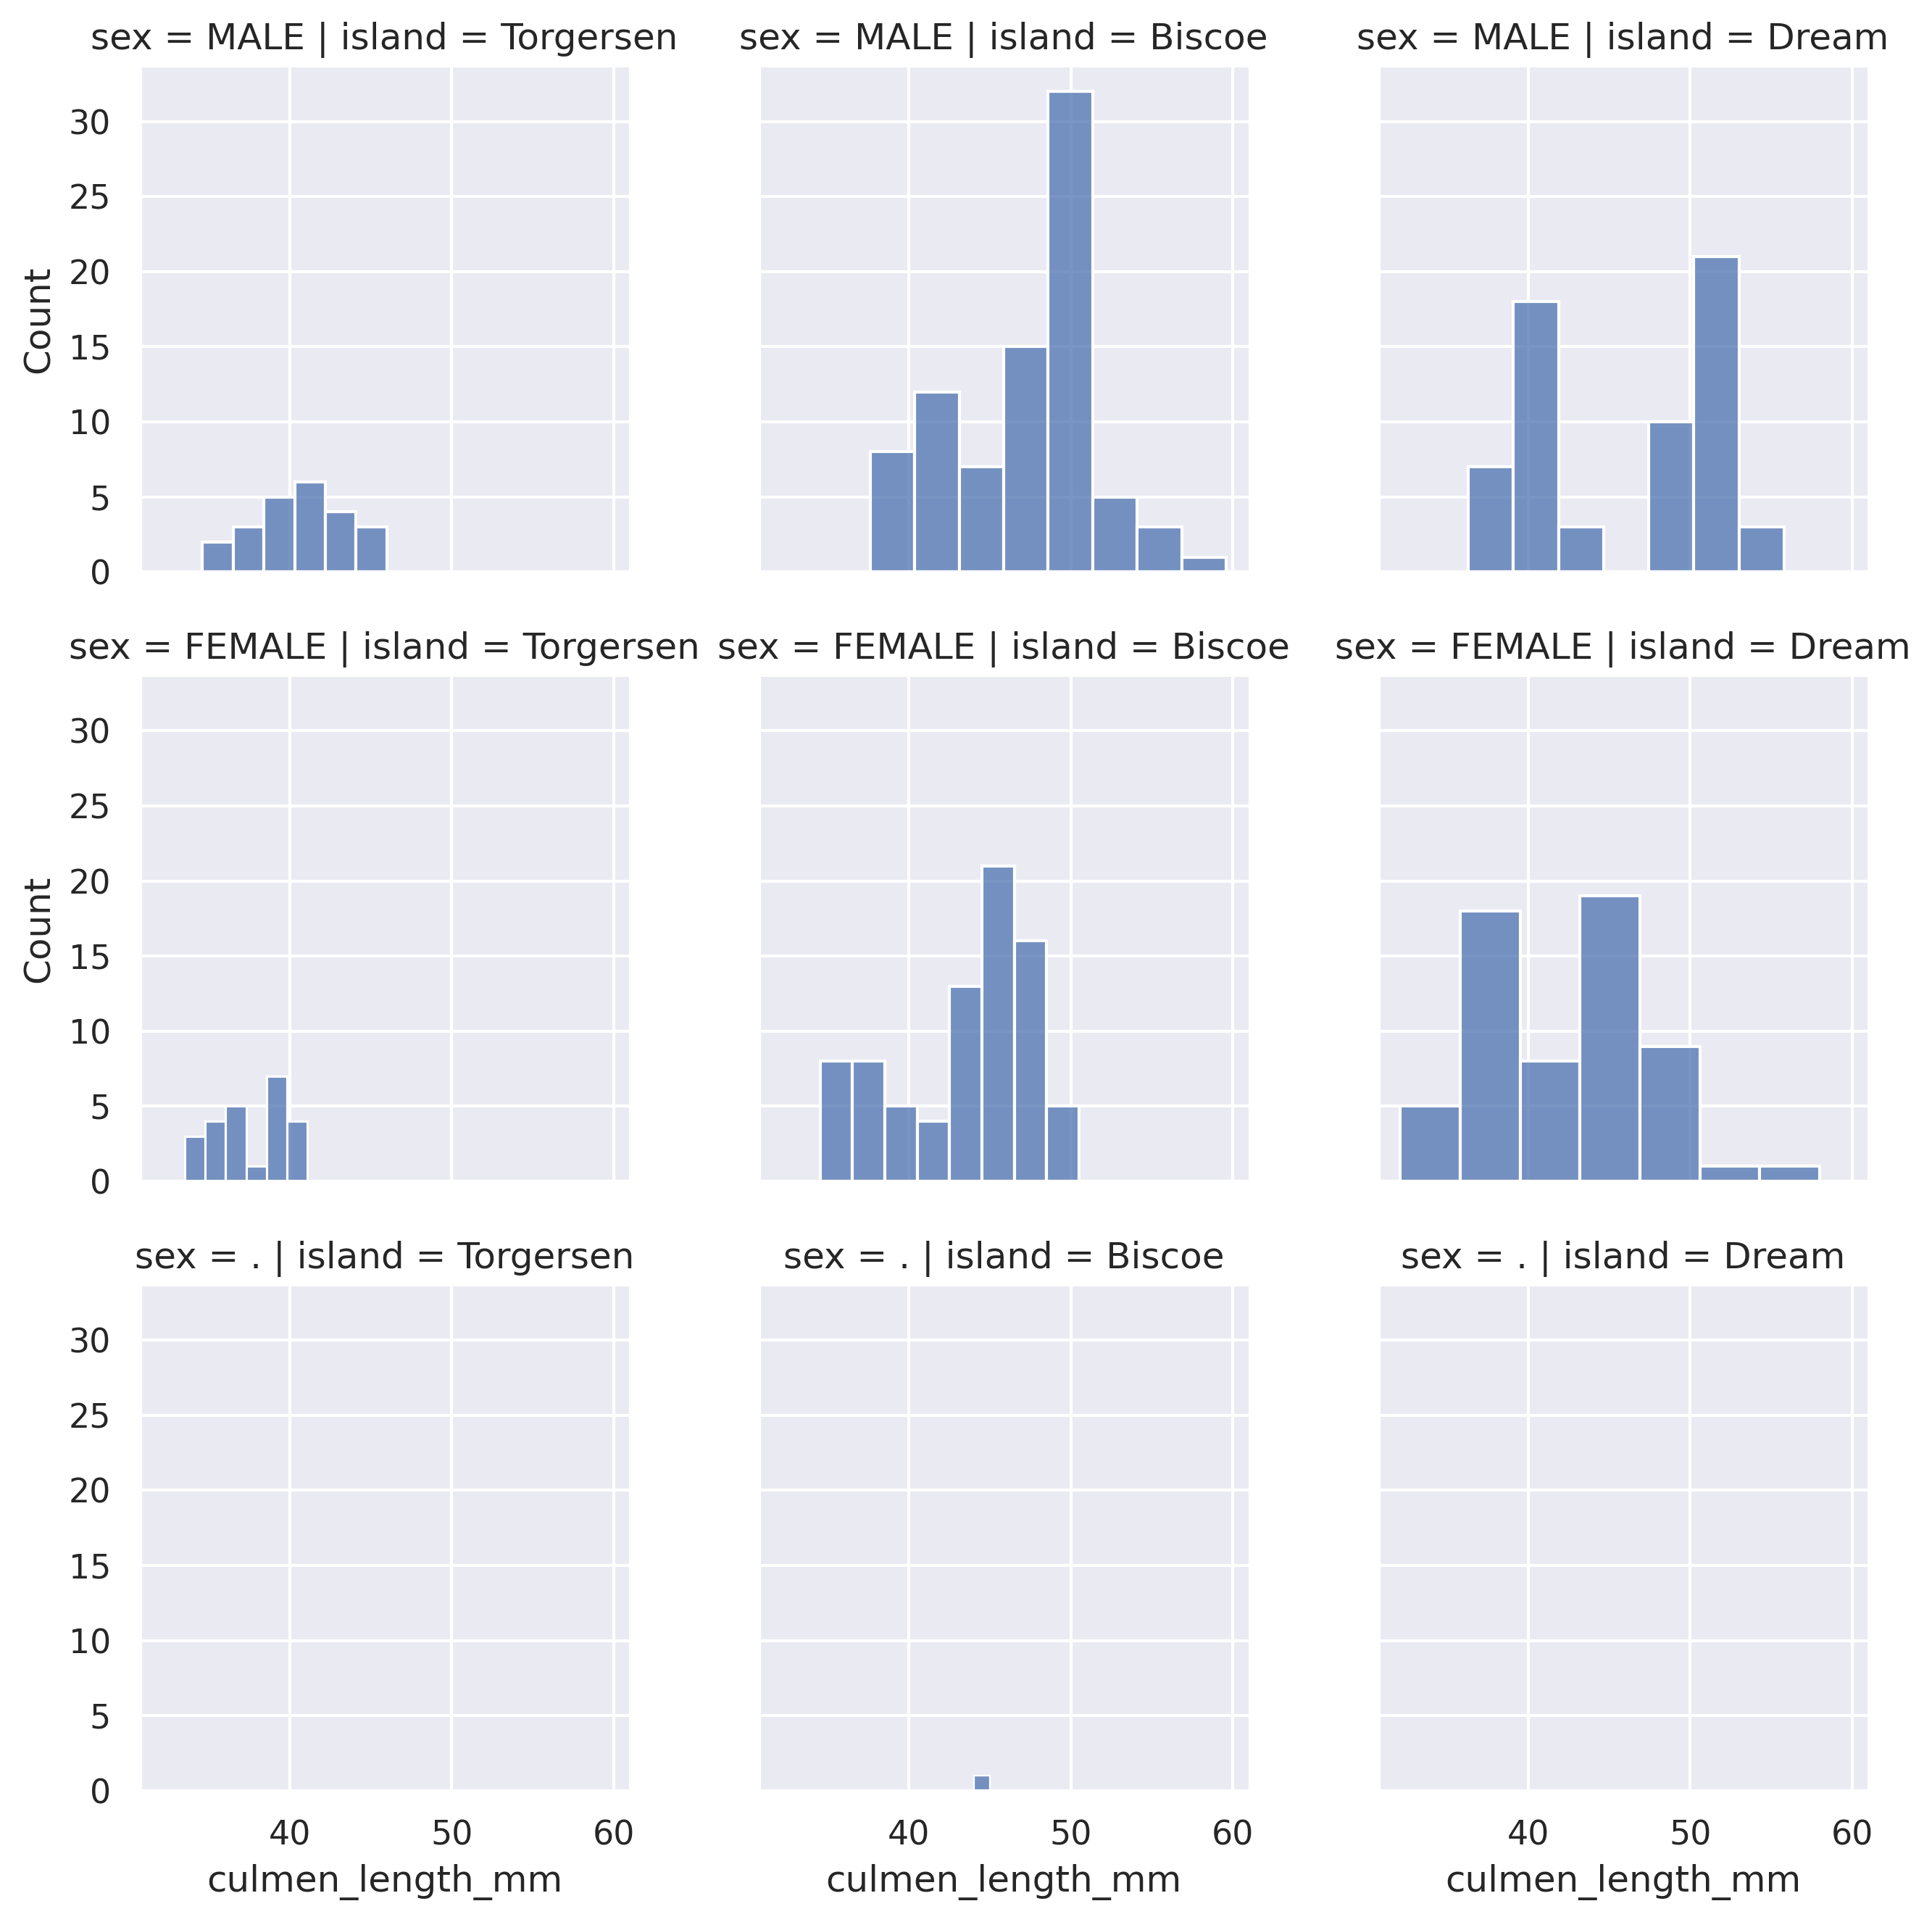

In [ ]:
sns.FacetGrid(df, col="island", row="sex").map(sns.histplot, "culmen_length_mm")
plt.show()

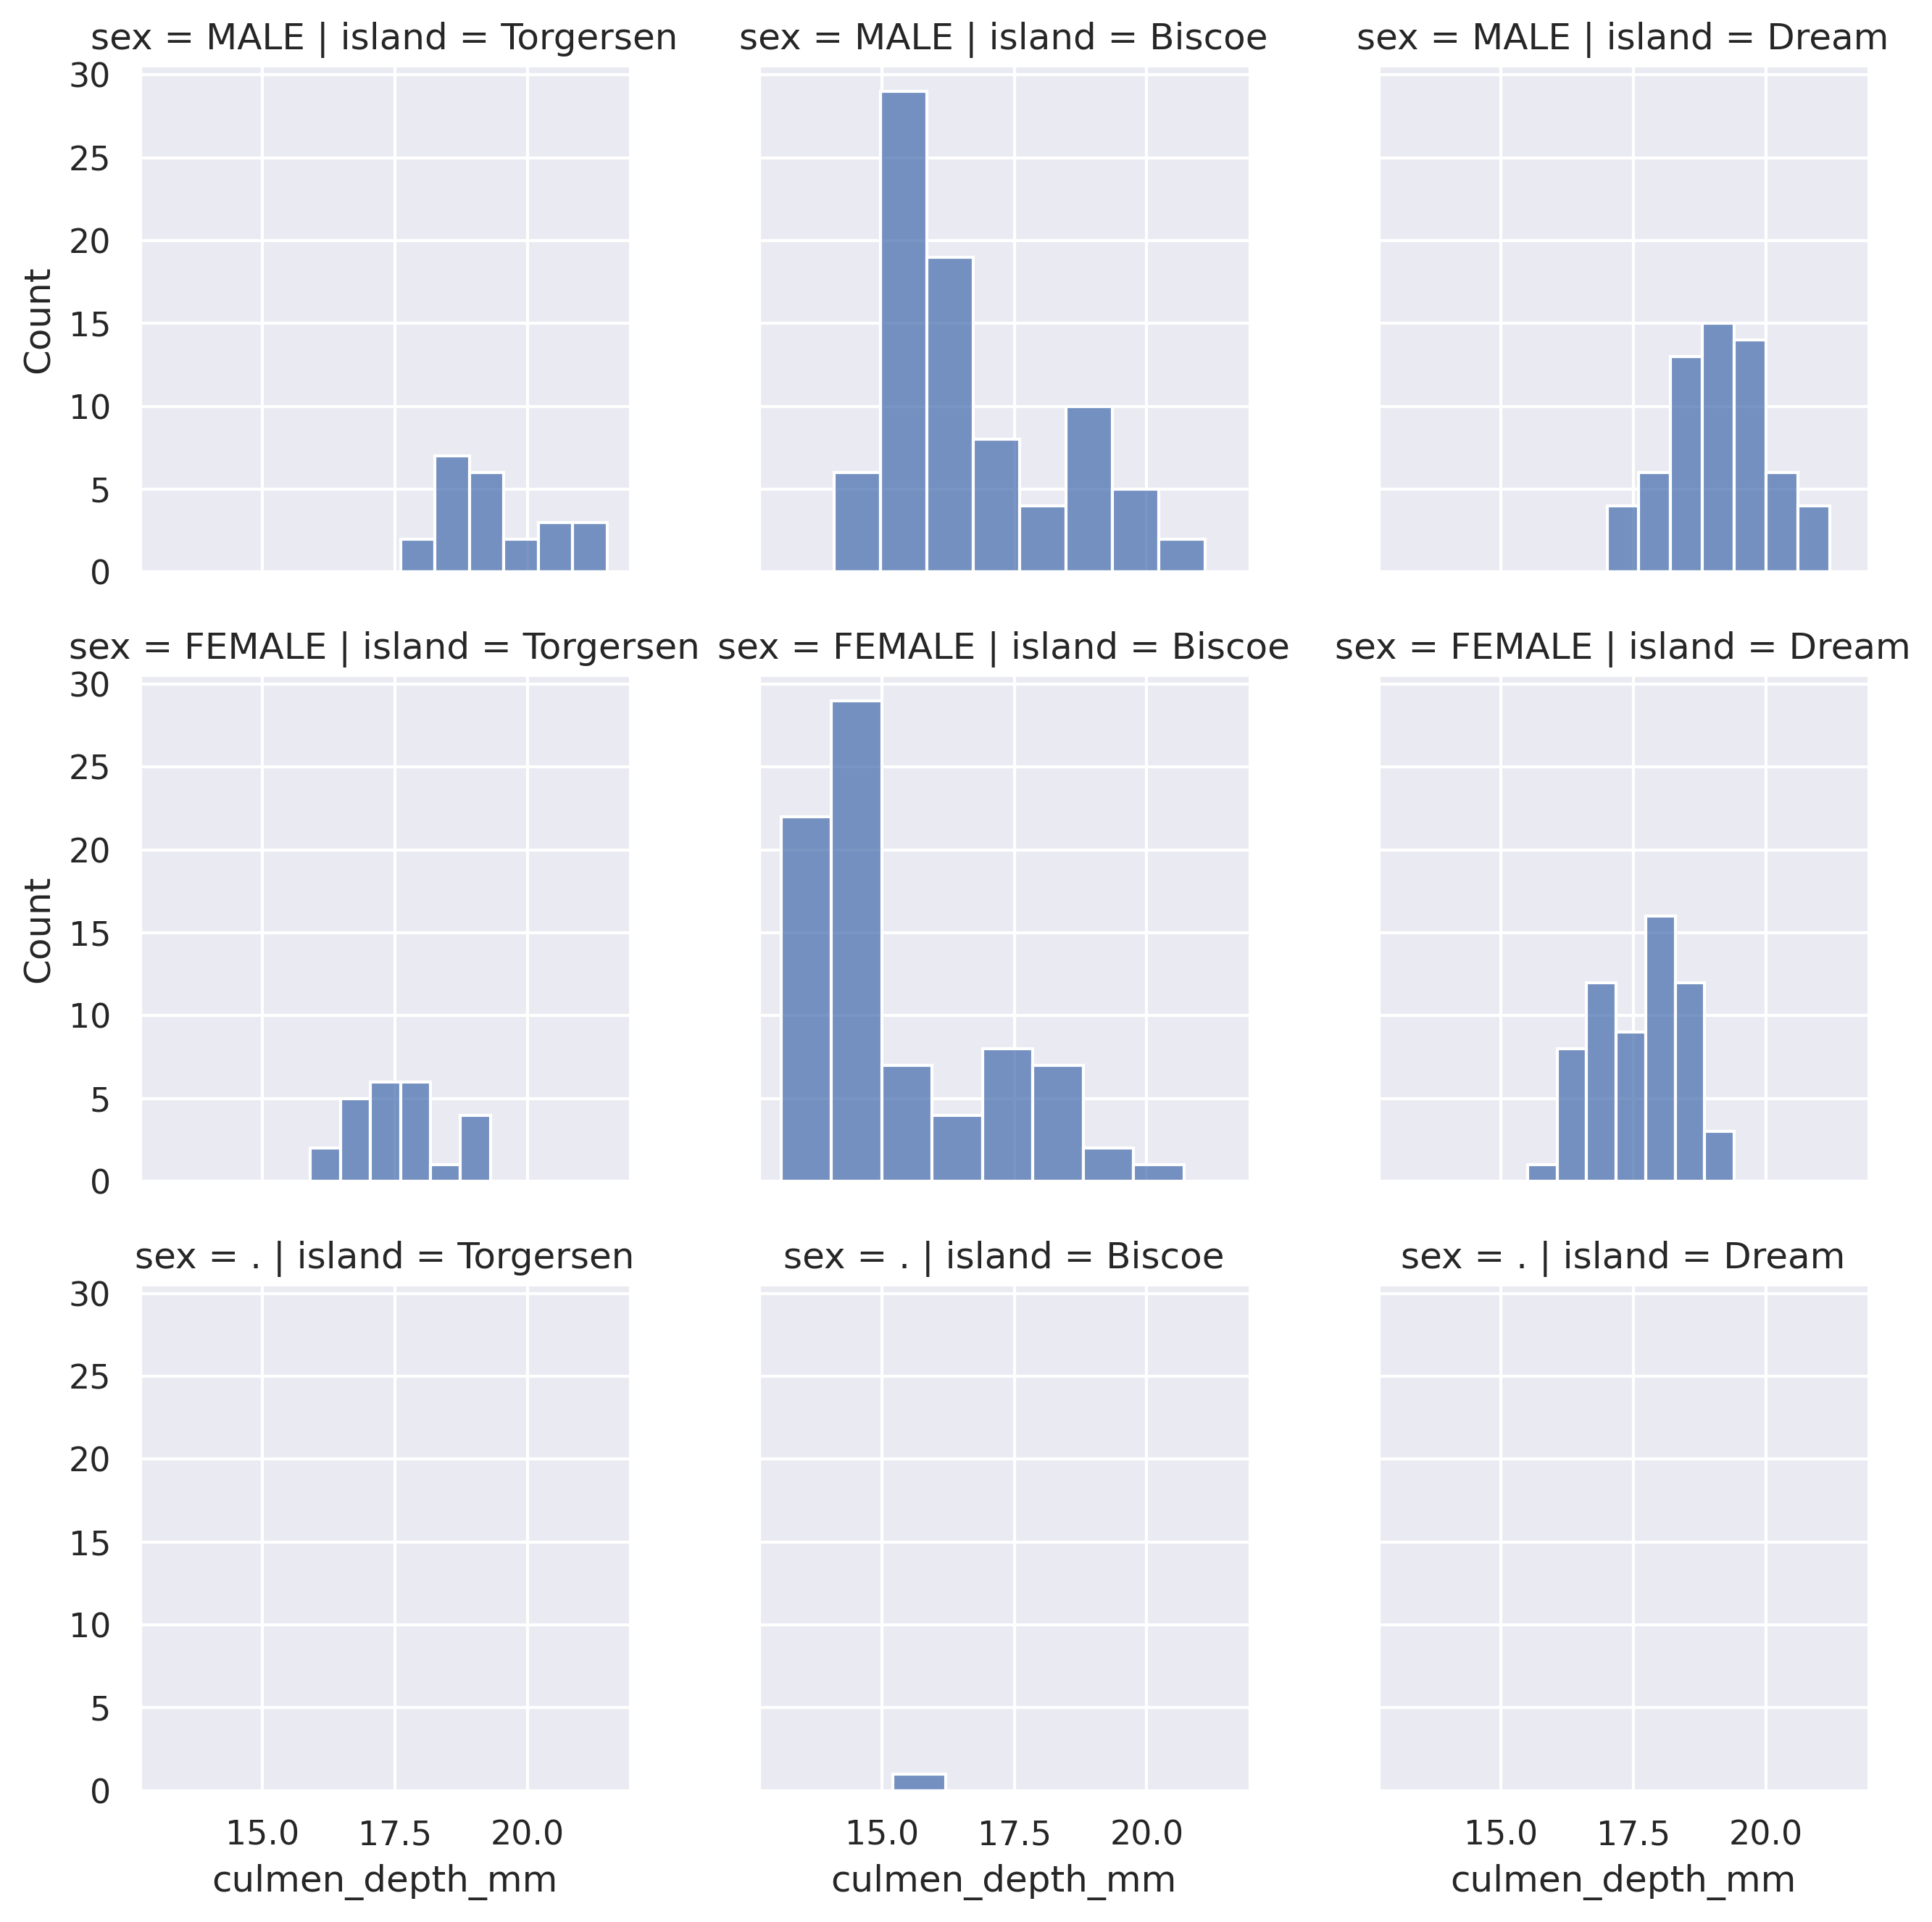

In [ ]:
sns.FacetGrid(df, col="island", row="sex").map(sns.histplot, "culmen_depth_mm")
plt.show()

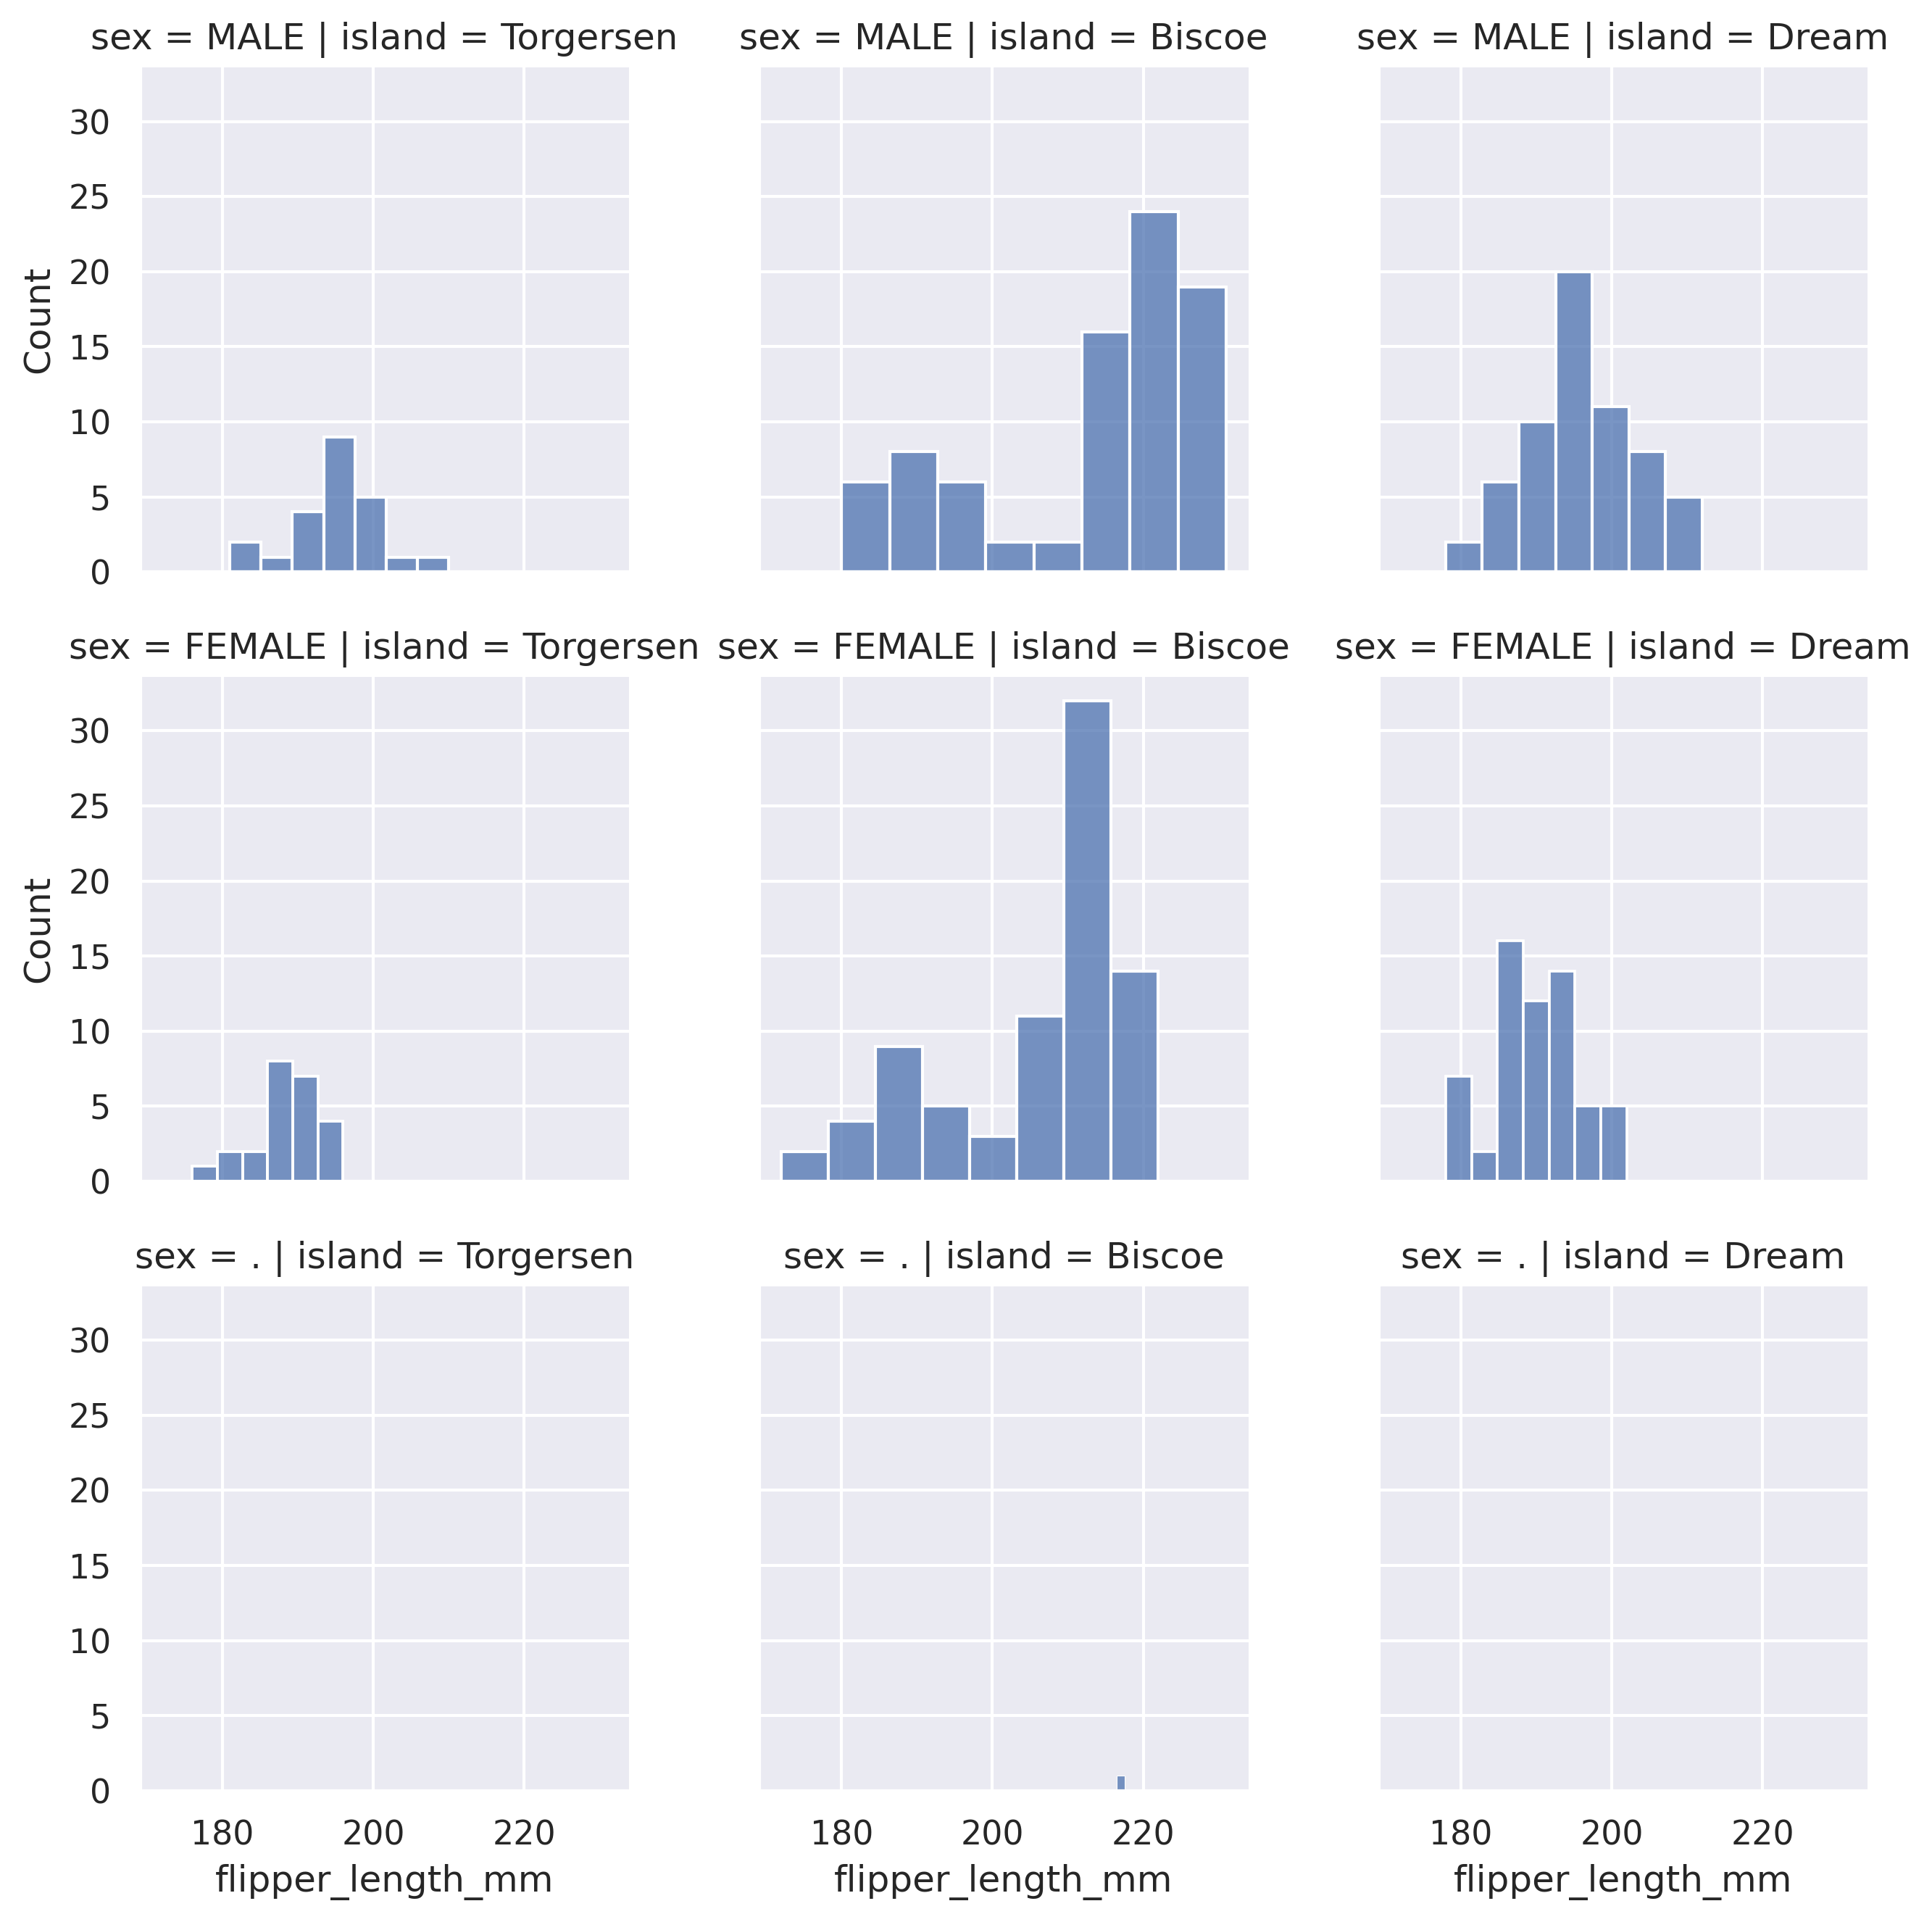

In [ ]:
sns.FacetGrid(df, col="island", row="sex").map(sns.histplot, "flipper_length_mm")
plt.show()

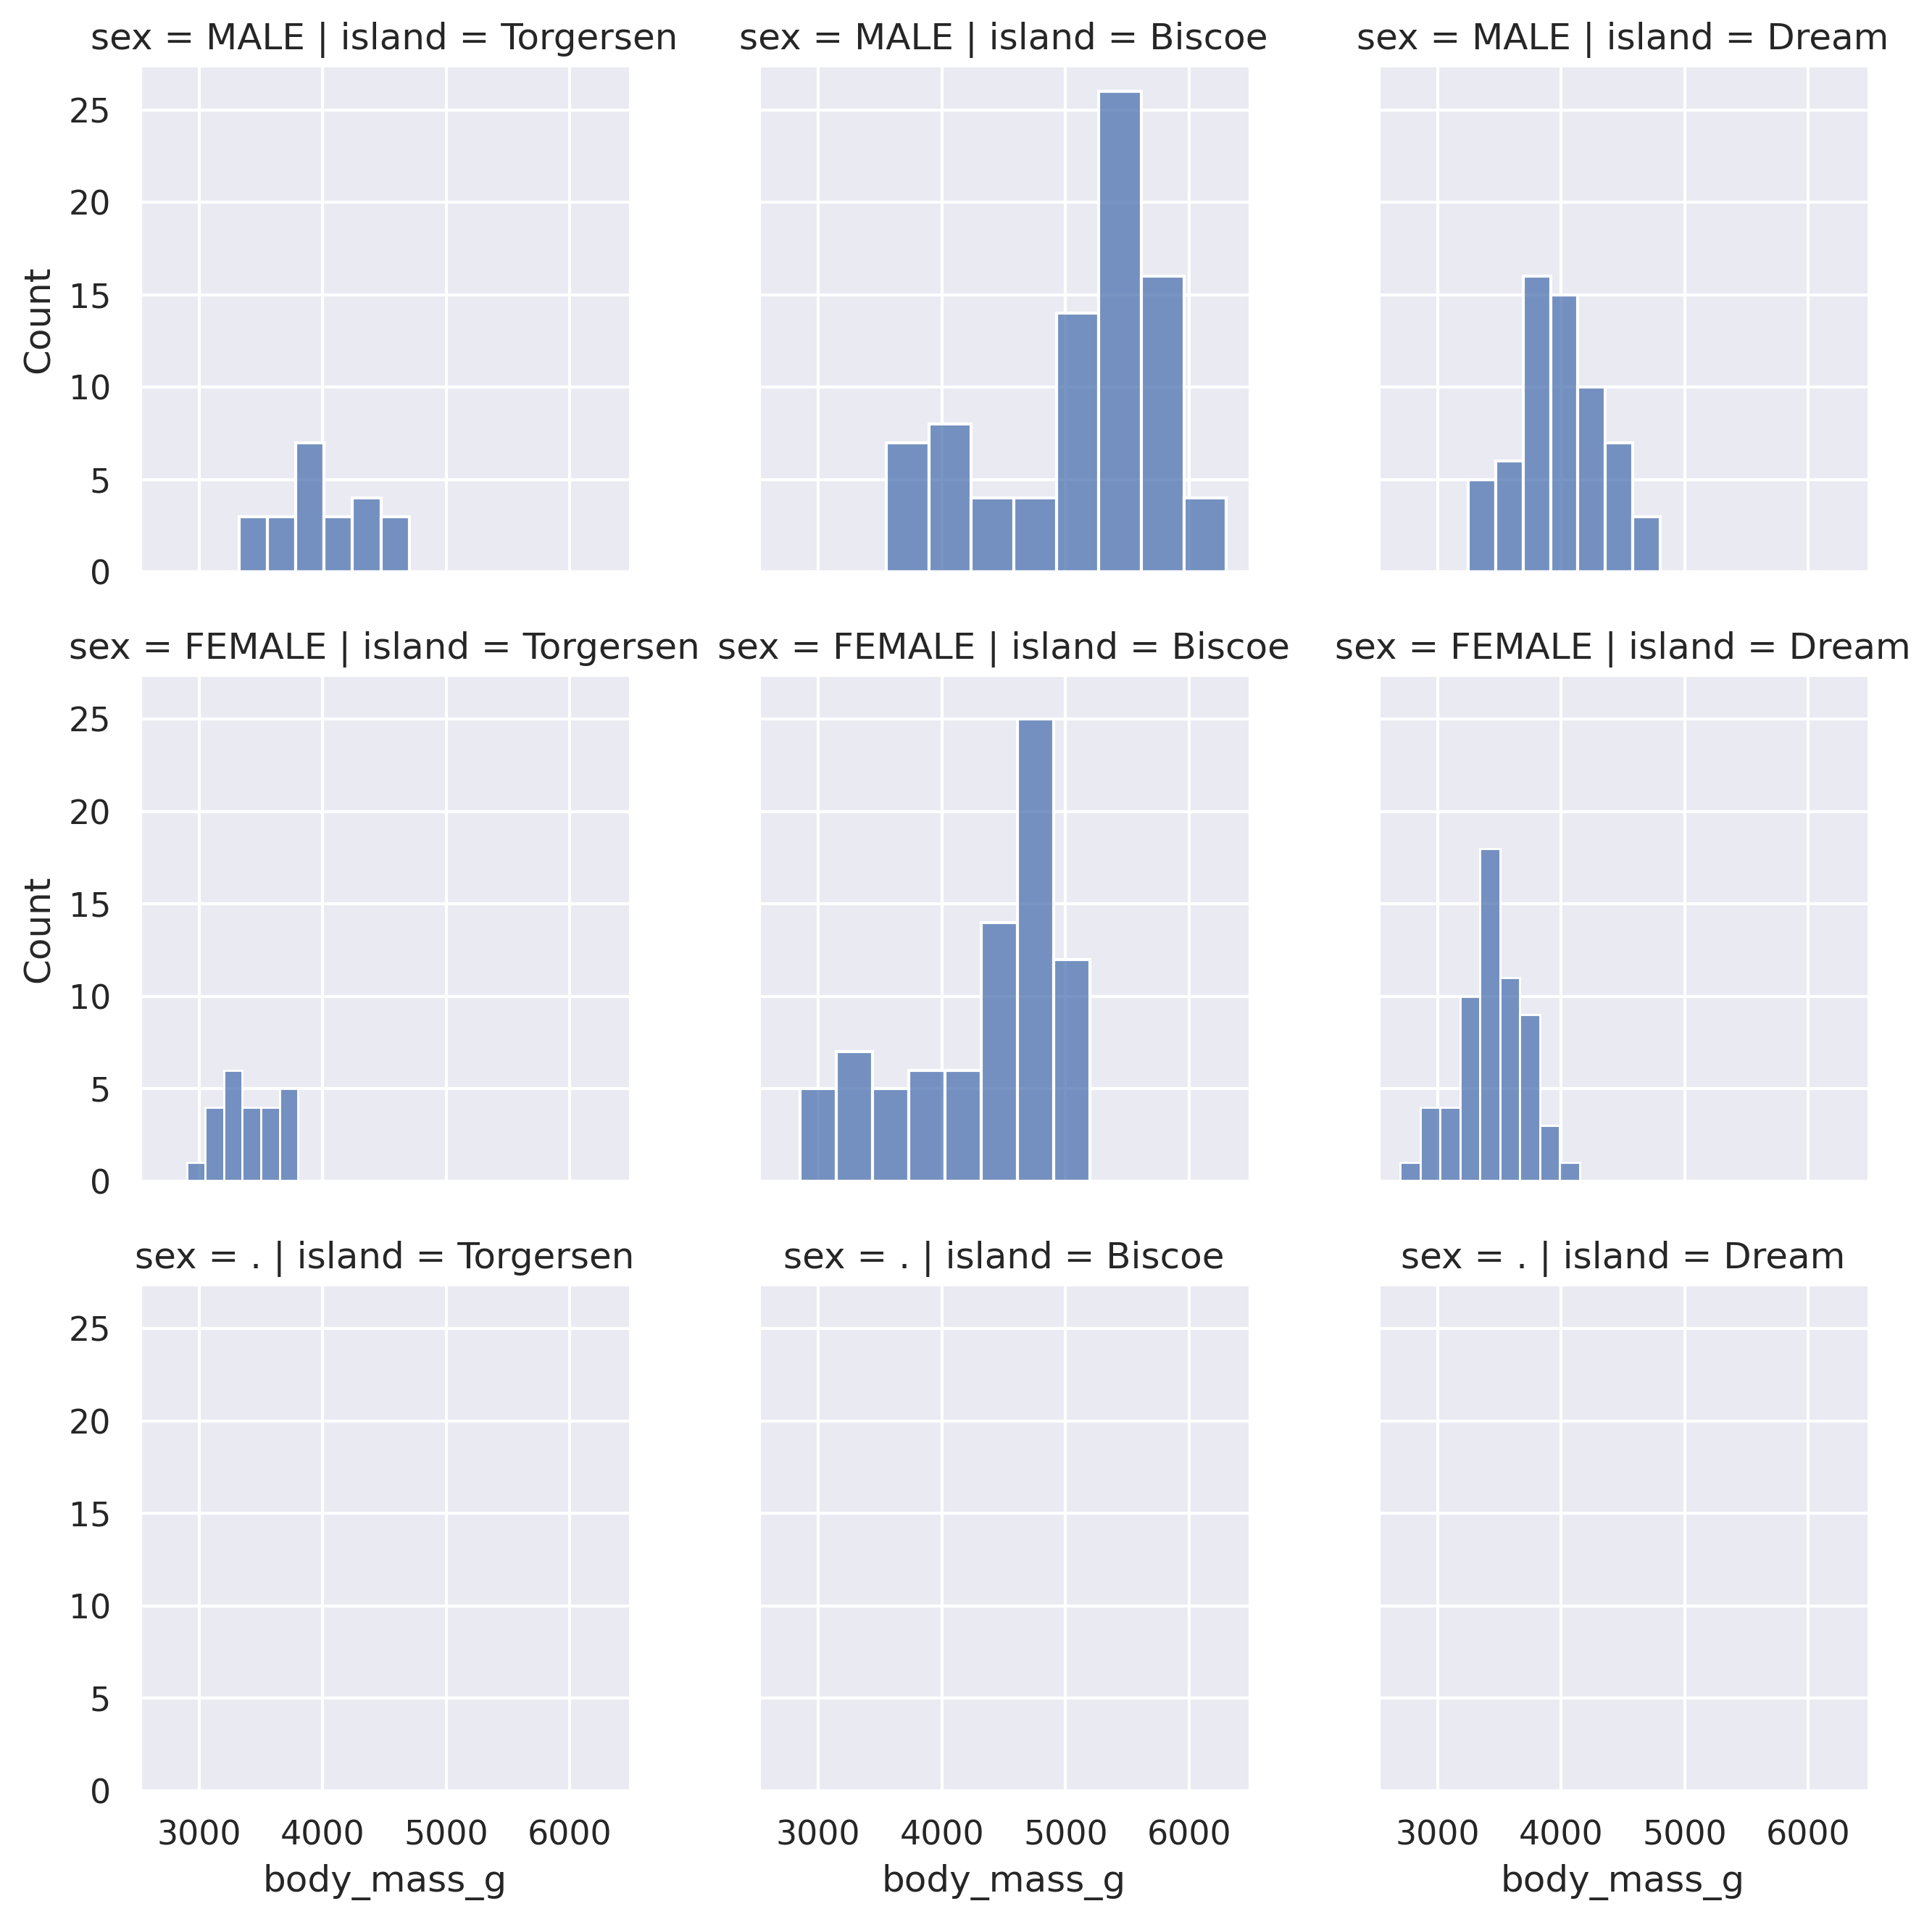

In [ ]:
sns.FacetGrid(df, col="island", row="sex").map(sns.histplot, "body_mass_g")
plt.show()

## Species and Sex

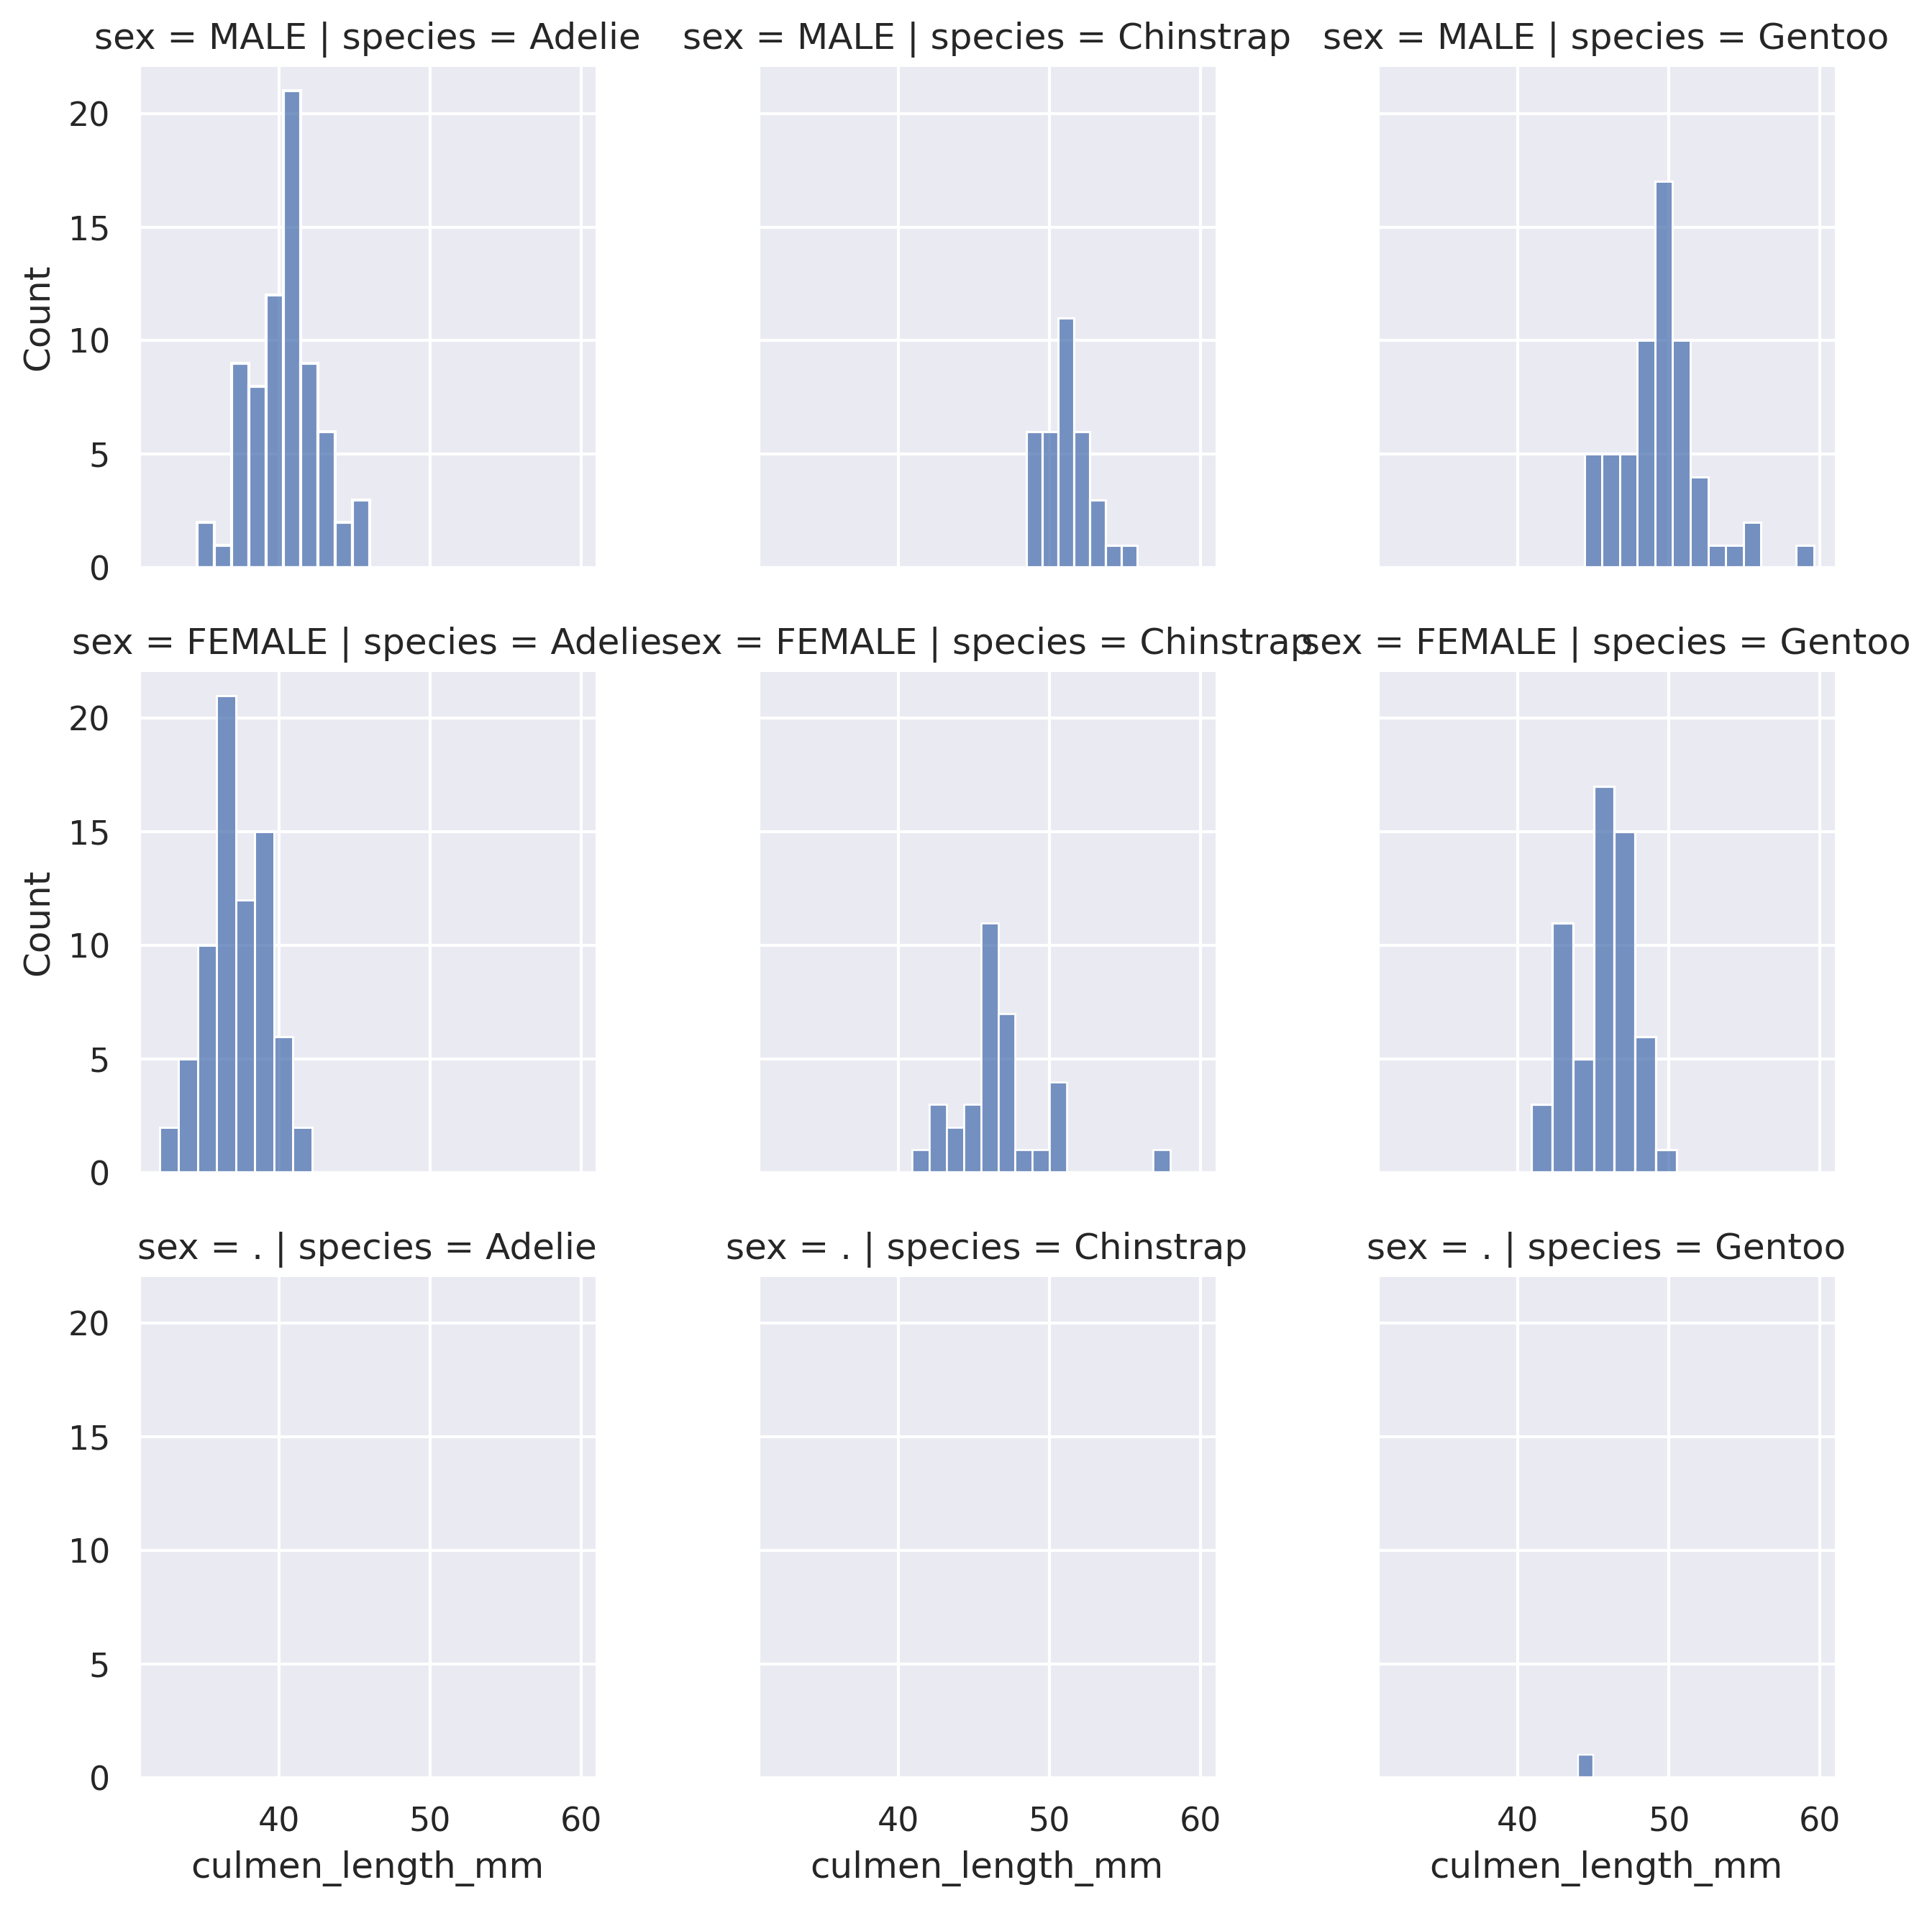

In [ ]:
sns.FacetGrid(df, col="species", row="sex").map(sns.histplot, "culmen_length_mm")
plt.show()

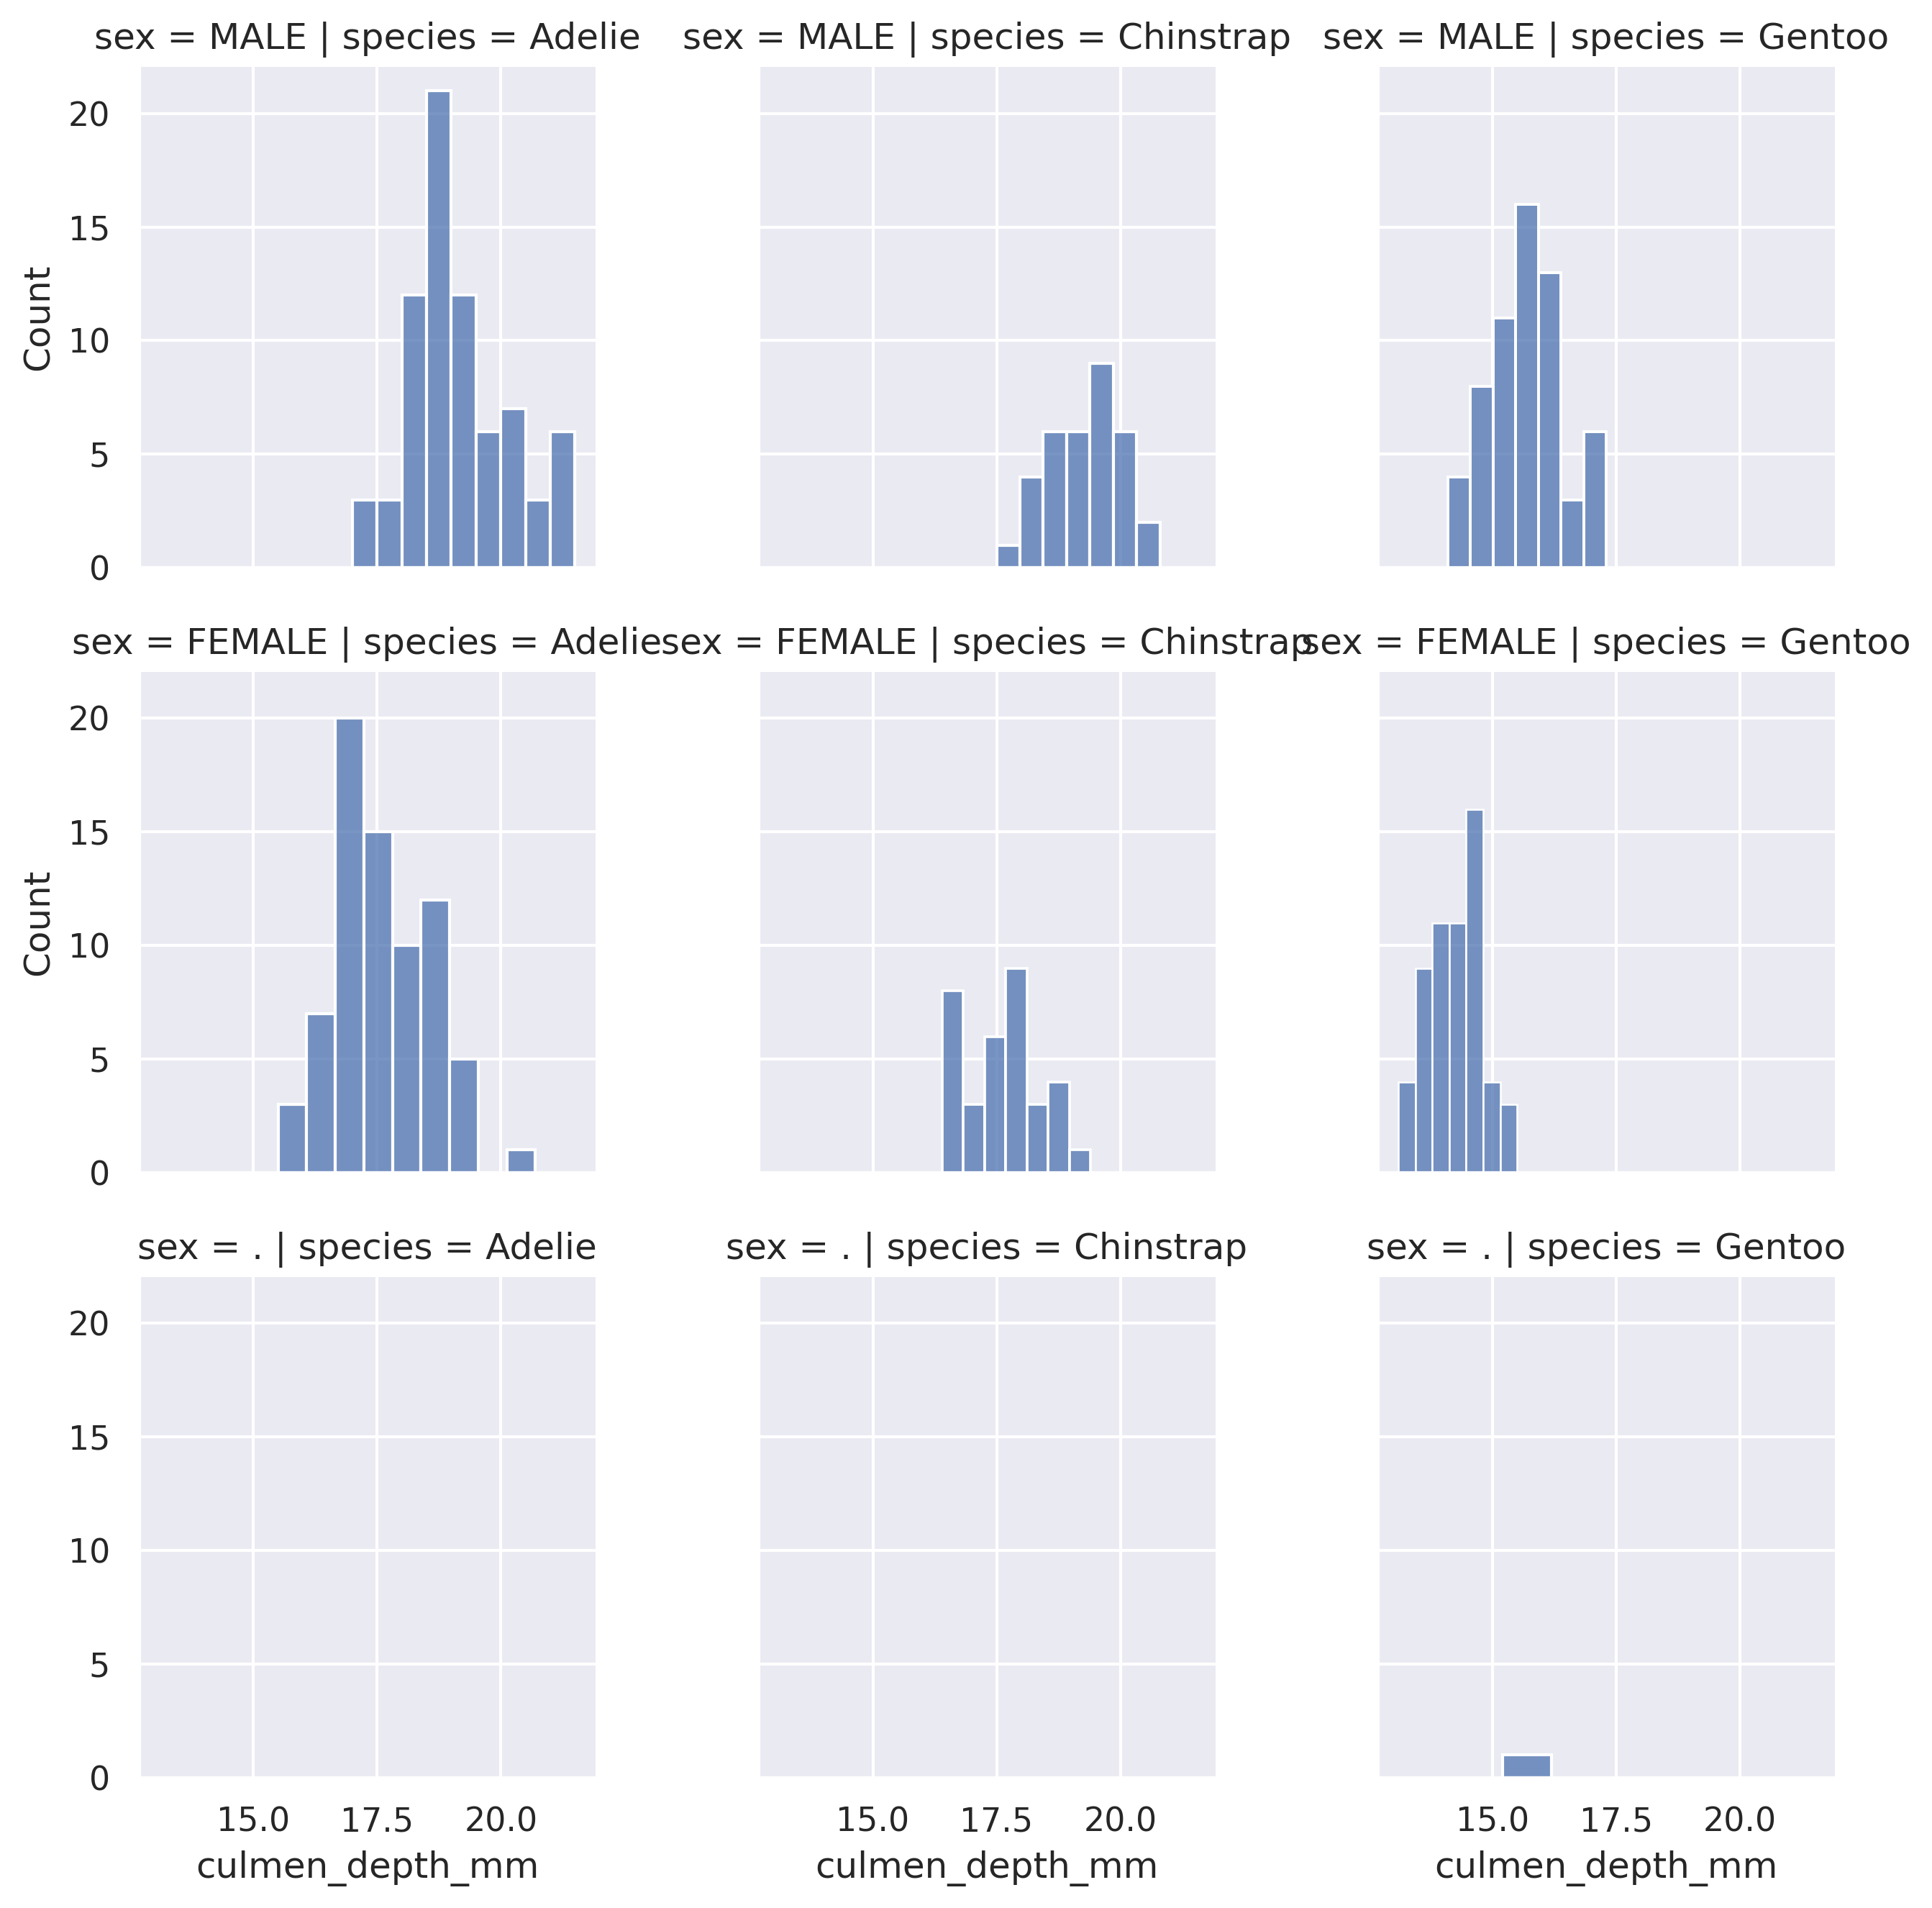

In [ ]:
sns.FacetGrid(df, col="species", row="sex").map(sns.histplot, "culmen_depth_mm")
plt.show()

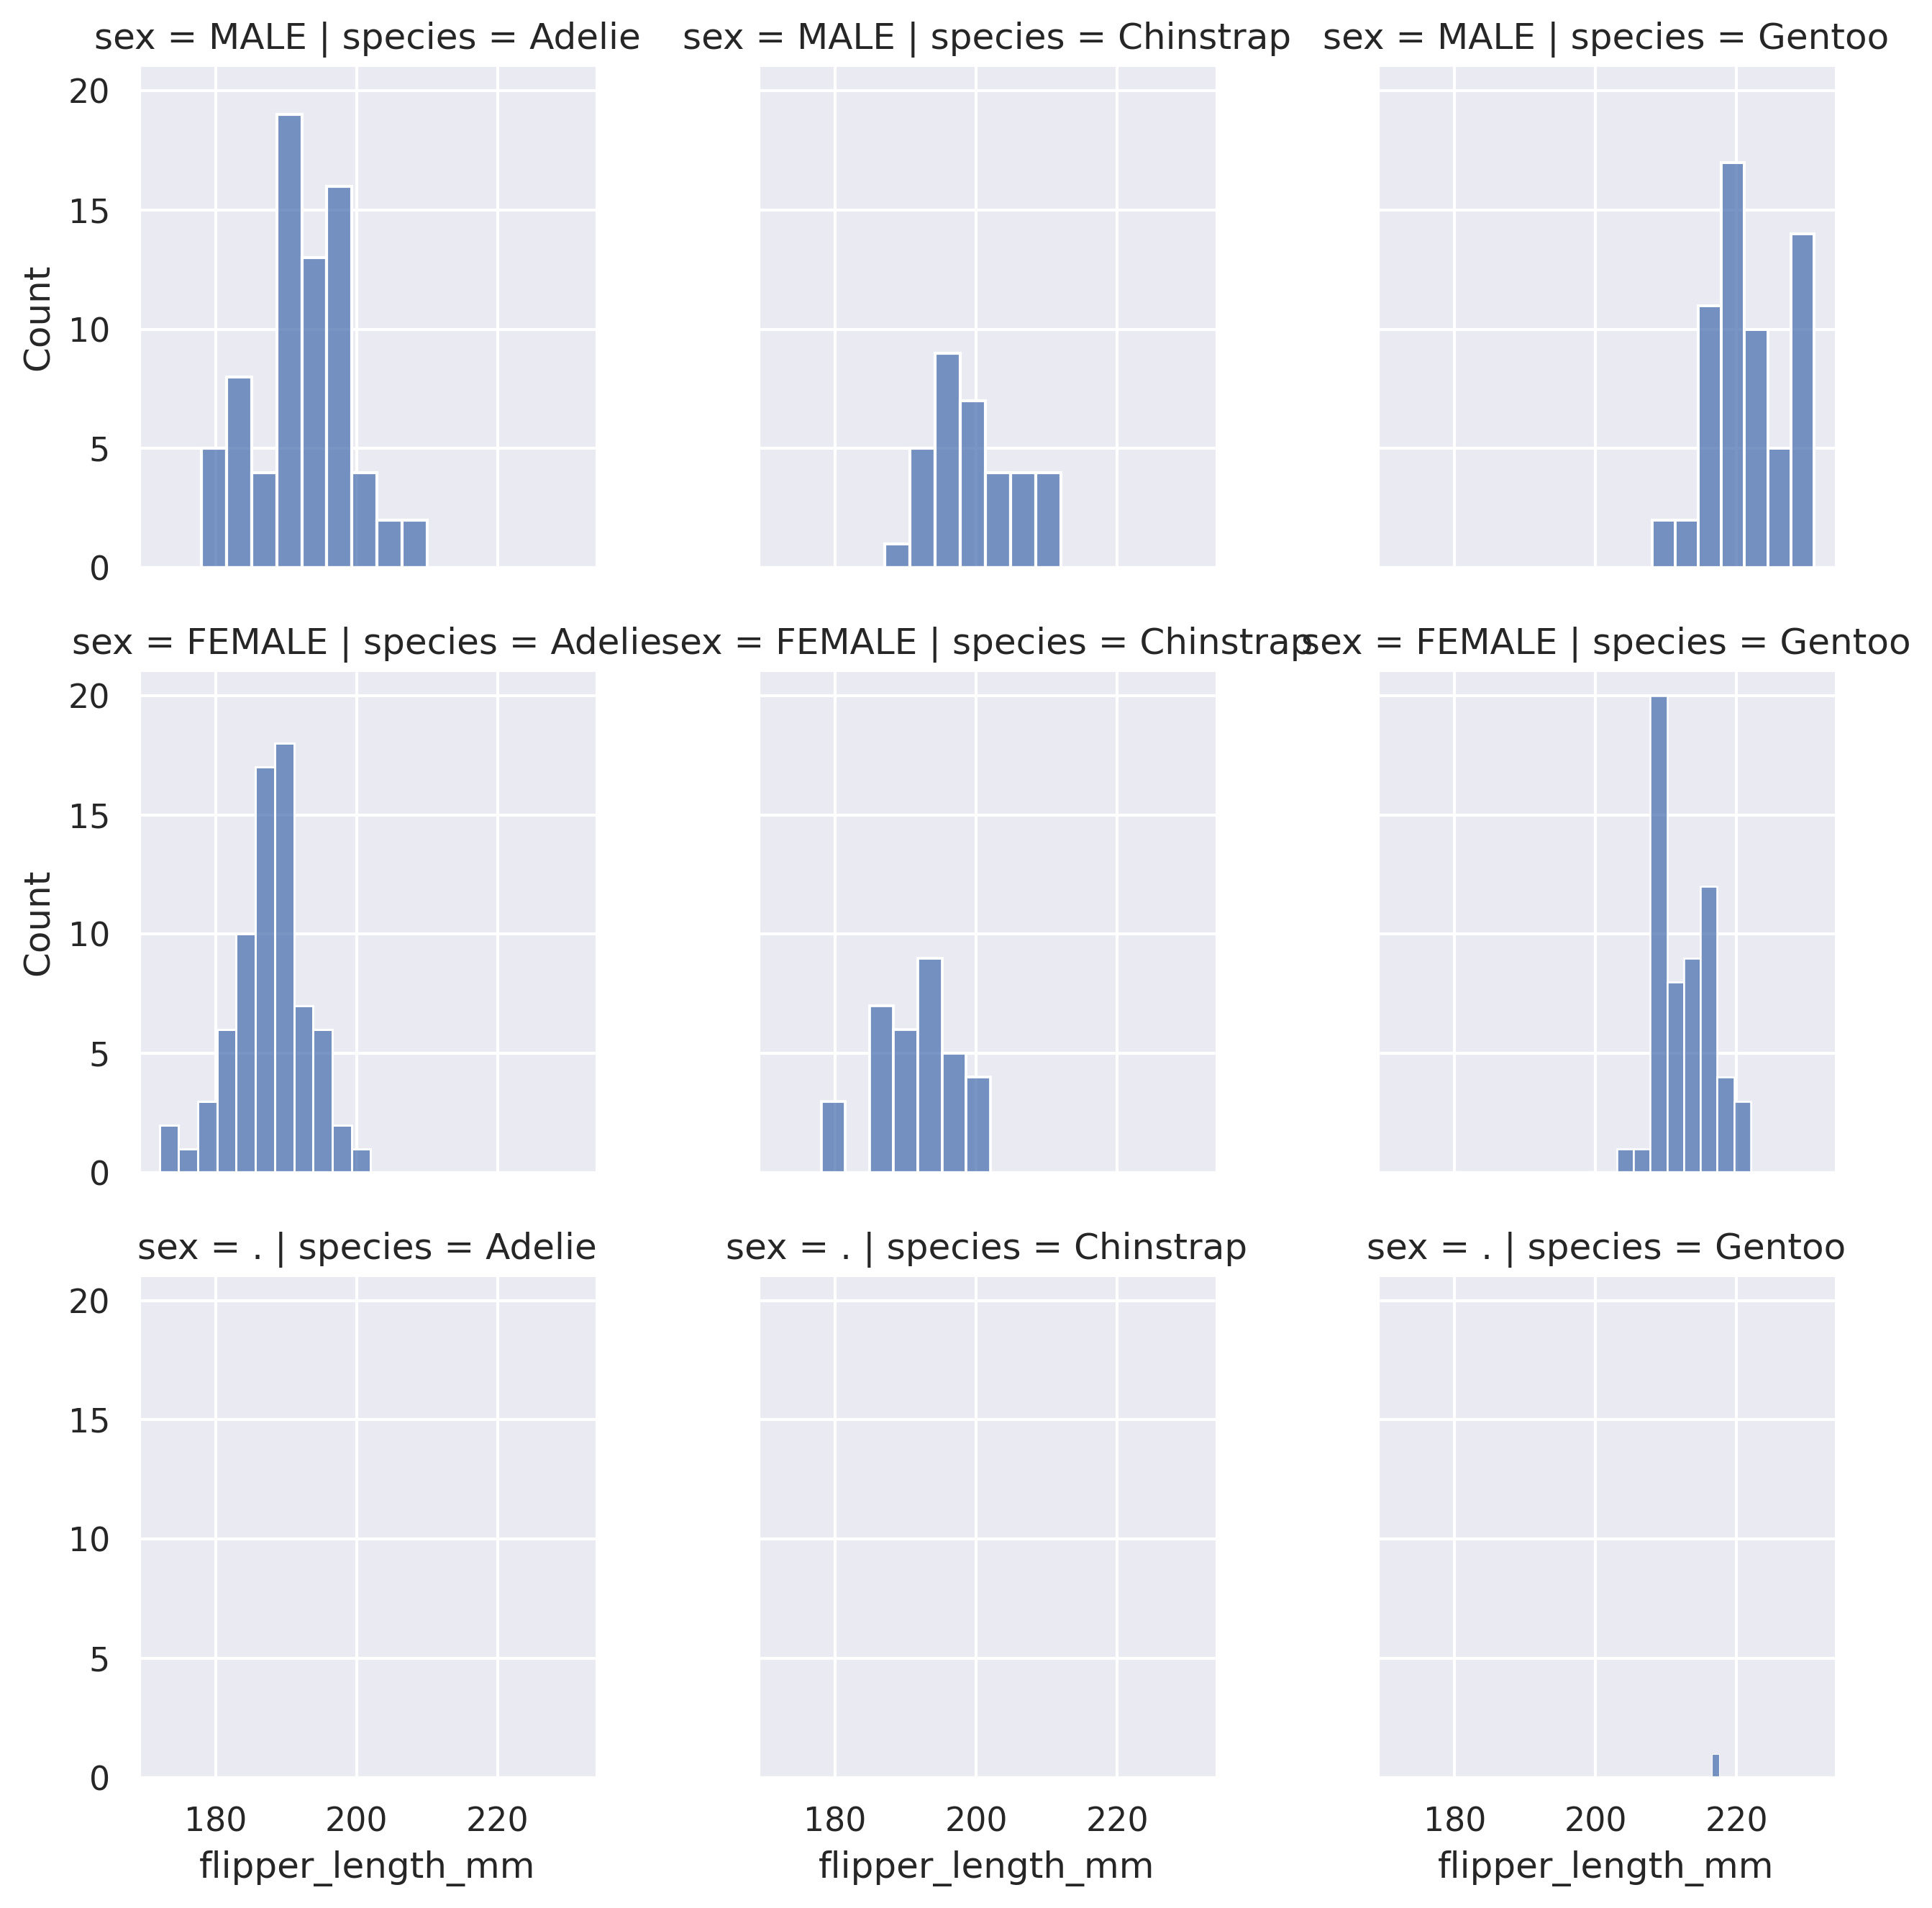

In [ ]:
sns.FacetGrid(df, col="species", row="sex").map(sns.histplot, "flipper_length_mm")
plt.show()

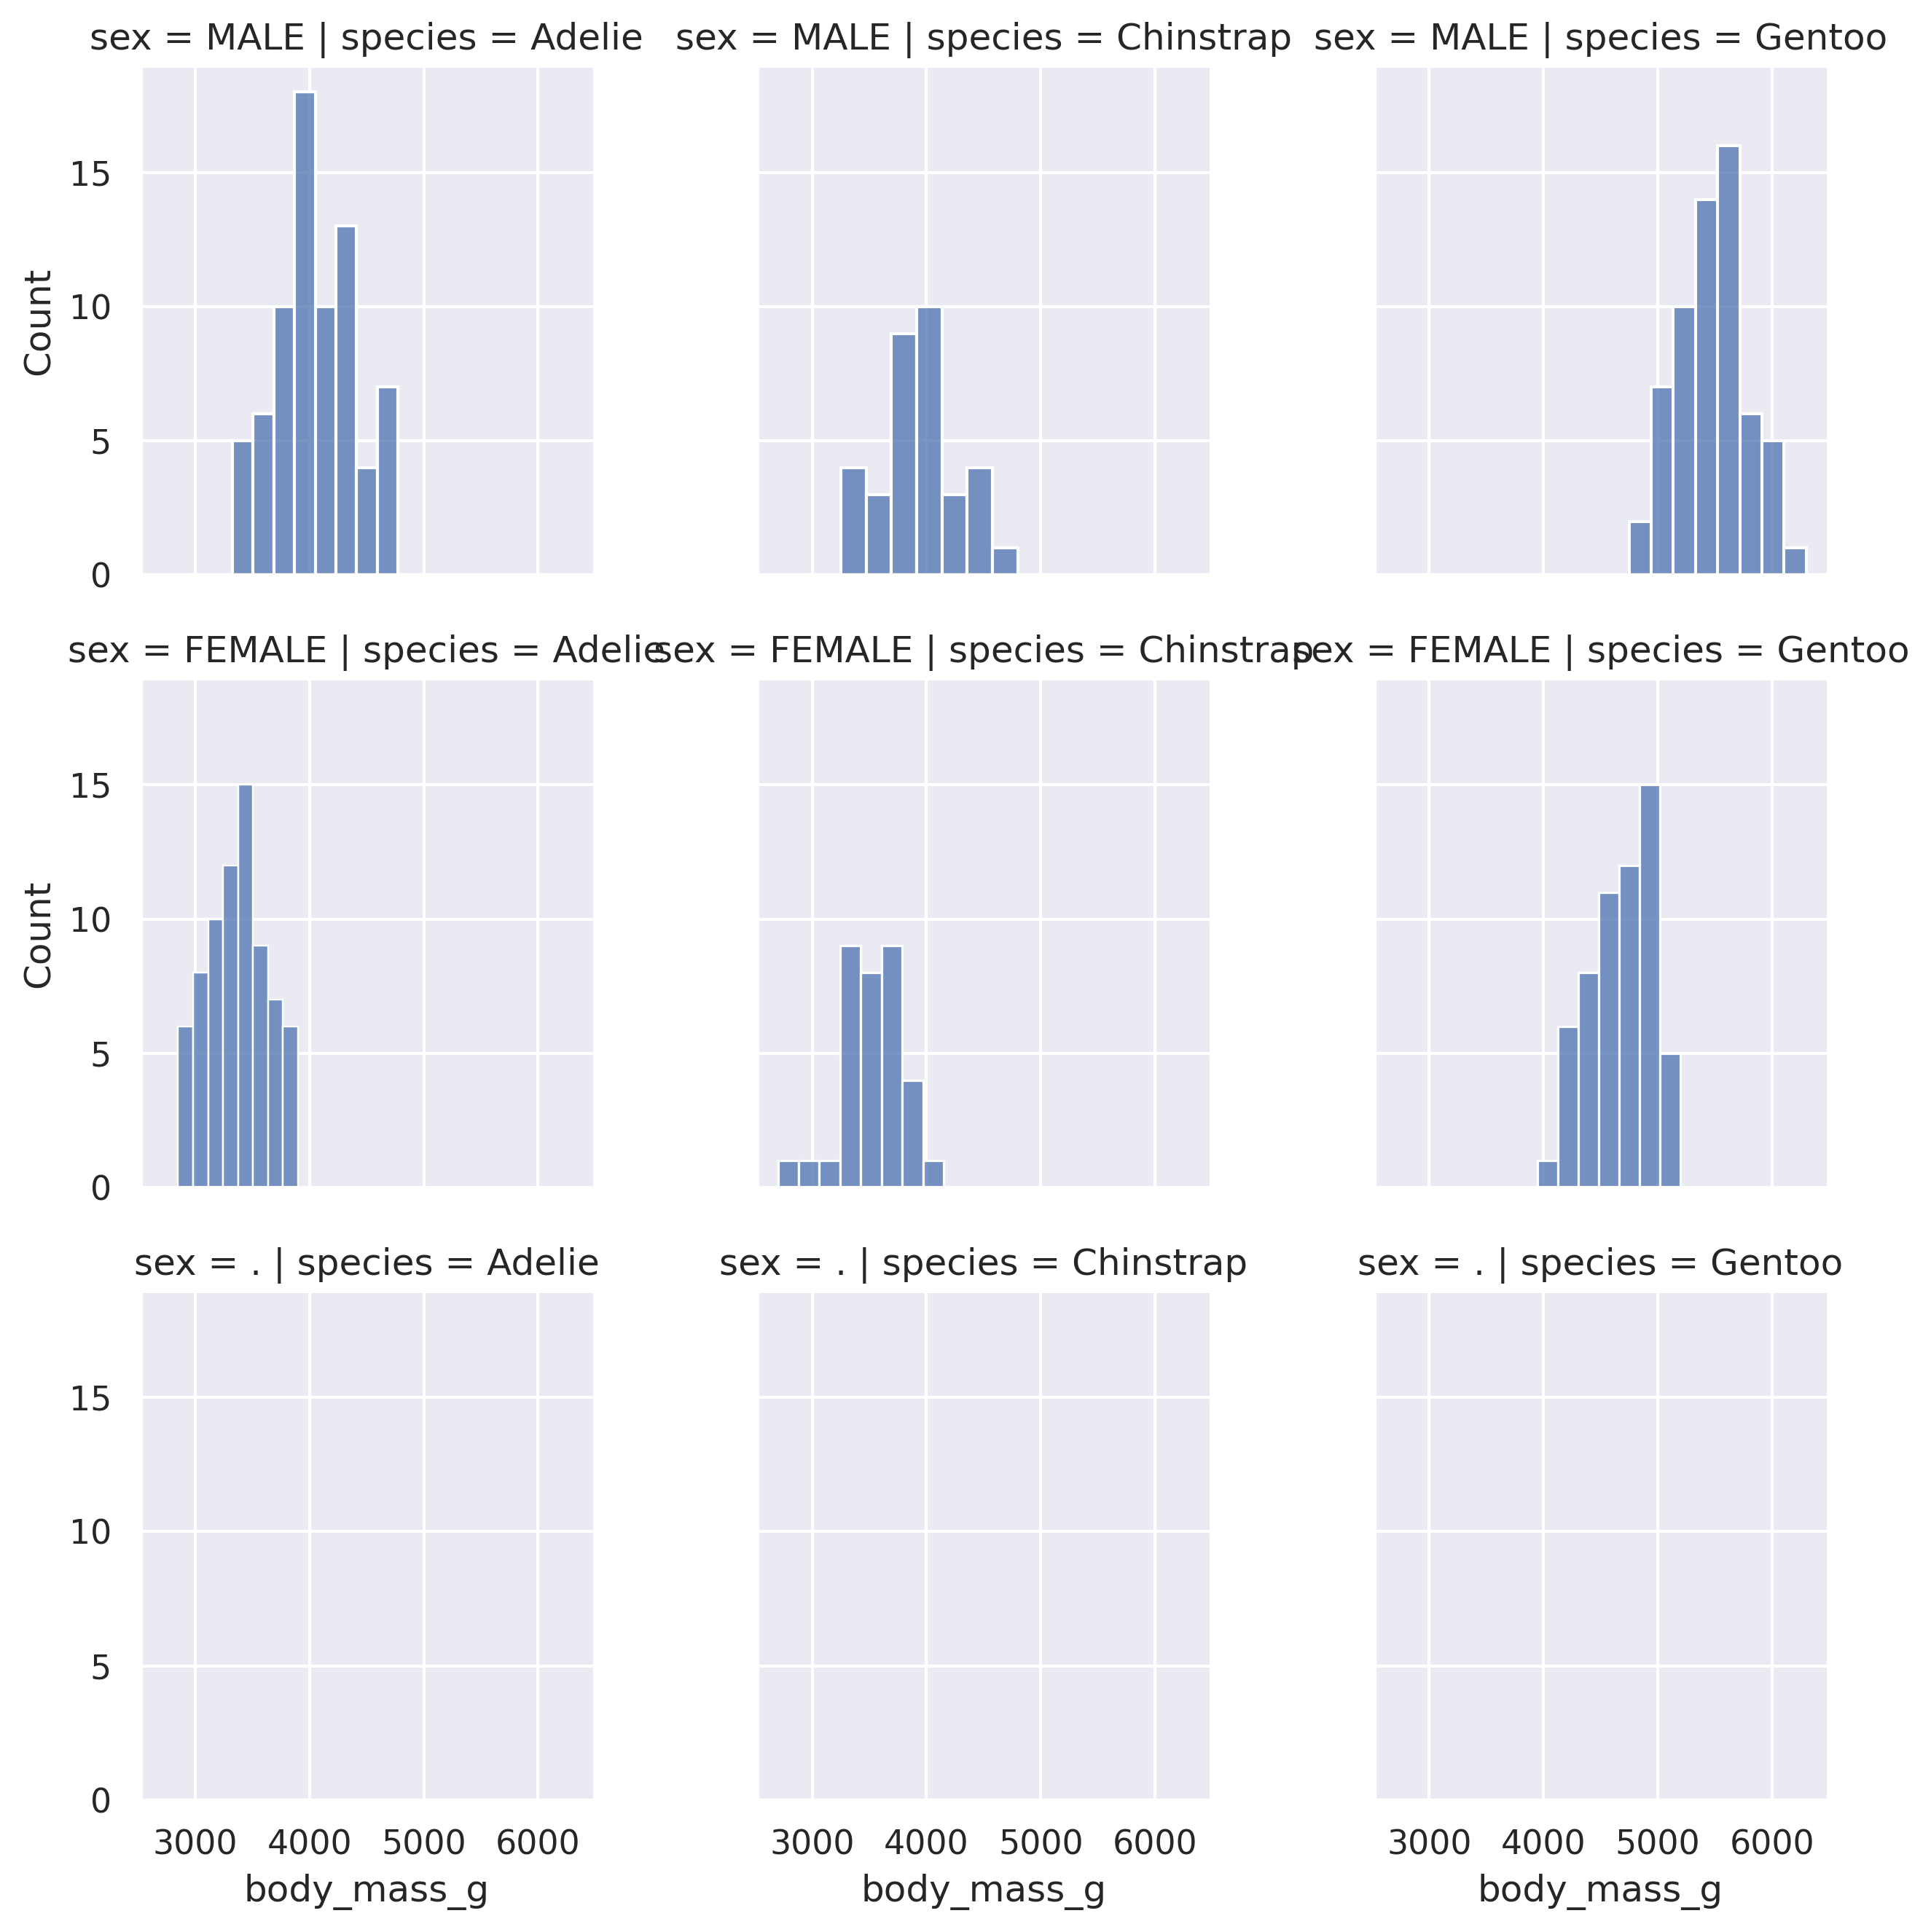

In [ ]:
sns.FacetGrid(df, col="species", row="sex").map(sns.histplot, "body_mass_g")
plt.show()

## Conclusion

Dari visualisasi data-data di atas kita dapat melihat bahwa, setiap penguin dan spesies memiliki bentuk dan fitur tubuh yang berbeda di setiap individunya. Hal ini dapat dipengaruhi oleh jenis kelamin mereka dan juga tempat atau habitat dimana mereka hidup.